# Advanced Machine Learning

## Going the Distance
Uses the PPO actor-critic method to train a neural network to control a simple robot in the RacingCar environment from OpenAI gym (https://gym.openai.com/envs/RacingCar-v0/). 

![Racing](racing_car.gif)

There are five discrete **actions** in this environment:
- left (0)
- right (1)
- brake (2)
- accelerate (3)
- none (4)

**Reward** of -0.1 is awarded every frame and +1000/N for every track tile visited, where N is the total number of tiles in track. For example, if you have finished in 732 frames, your reward is 1000 - 0.1*732 = 926.8 points.

And the **state** is represented using a single image frame (96 * 96).

### Initialisation

If using Google colab you need to install packages - comment out lines below.

In [1]:
#!apt install swig cmake ffmpeg
#!apt-get install -y xvfb x11-utils
#!pip install stable-baselines3[extra] pyglet box2d box2d-kengz
#!pip install pyvirtualdisplay PyOpenGL PyOpenGL-accelerate

For Google colab comment out this cell to make a virtual rendering canvas so render calls work (we still won't see display!)

In [2]:
#import pyvirtualdisplay

#_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
#                                   size=(1400, 900))
#_ = _display.start()

Import required packages. 

In [3]:
#!pip install keras_gym

In [4]:
import torch 
import gym
import stable_baselines3 as sb3
#import keras_gym as km

import pandas as pd # For data frames and data frame manipulation
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
import numpy as np # For general  numeric operations

import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
num_eval_blocks = 20
num_timesteps = 500000

### Create and Explore the Environment

Create the **CarRacing-v0** environment. Add wrappers to resize the images and convert to greyscale.

In [6]:
env = gym.make('CarRacing-v0')
env = gym.wrappers.resize_observation.ResizeObservation(env, 64)
env = gym.wrappers.gray_scale_observation.GrayScaleObservation(env, keep_dim = True)
print(env.observation_space.shape)

(64, 64, 1)


Explore the environment - view the action space and observation space.

In [7]:
env.action_space

Box([-1.  0.  0.], [1. 1. 1.], (3,), float32)

In [8]:
env.observation_space

Box([[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]], [[[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 ...

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]], (64, 64, 1), uint8)

Play an episode of the environment using random actions

In [9]:
# Add code here
obs = env.reset()
done = False
while not done:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    env.render()
    #time.sleep(0.05) 

Track generation: 1185..1485 -> 300-tiles track


2022-04-25 14:36:56.700 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f9918ca3730>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 14:36:56.701 python[62229:2848141] Warning: Expected min height of view: (<NSButton: 0x7f9918cc4500>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 14:36:56.703 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f9918cc4c80>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 14:36:56.704 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f9918cc7110>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


### Single Image Agent
Create an agent that controls the car using a single image frame as the state input. We recommend a PPO agent with the following hyper-parameters (although you can experiment):
- learning_rate = 3e-5
- n_steps = 512
- ent_coef = 0.001
- batch_size = 128
- gae_lambda =  0.9
- n_epochs = 20
- use_sde = True
- sde_sample_freq = 4
- clip_range = 0.4
- policy_kwargs = {'log_std_init': -2, 'ortho_init':False},

We also recommend enabling **tensorboard** monitoring of the training process.

In [10]:
# Add code here
tb_log = './log_tb_CarRacing_PPO/Simgle_Image/'
agent = sb3.PPO('CnnPolicy', 
                env,
                learning_rate = 3e-5,
                n_steps = 512,
                ent_coef = 0.001,
                batch_size = 128,
                gae_lambda = 0.9,
                n_epochs = 20,
                use_sde = True,
                sde_sample_freq = 4,
                clip_range = 0.4,
                policy_kwargs = {'log_std_init': -2, 'ortho_init':False},
                verbose = 1, 
                tensorboard_log = tb_log)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


Examine the actor and critic network architectures.

In [11]:
# Add code here
print(agent.policy)

ActorCriticCnnPolicy(
  (features_extractor): NatureCNN(
    (cnn): Sequential(
      (0): Conv2d(1, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=1024, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (mlp_extractor): MlpExtractor(
    (shared_net): Sequential()
    (policy_net): Sequential()
    (value_net): Sequential()
  )
  (action_net): Linear(in_features=512, out_features=3, bias=True)
  (value_net): Linear(in_features=512, out_features=1, bias=True)
)


Create an evaluation callback that is called every at regular intervals and renders the episode.

In [12]:
# Add code here
eval_env = gym.make('CarRacing-v0')
eval_env = gym.wrappers.resize_observation.ResizeObservation(eval_env, 64)
eval_env = gym.wrappers.gray_scale_observation.GrayScaleObservation(eval_env, keep_dim = True)
print(eval_env.observation_space.shape)

eval_log_path = './logs_CarRacing_ppo/Single_Image/'
eval_callback = sb3.common.callbacks.EvalCallback(eval_env, 
                                                  best_model_save_path = eval_log_path,
                                                  log_path = eval_log_path, 
                                                  eval_freq = int(num_timesteps/num_eval_blocks),
                                                  render = False)

(64, 64, 1)


Train the model for a large number of timesteps (500,000 timesteps will probably work well).

In [13]:
# Add code here
agent.learn(total_timesteps=num_timesteps, 
            callback = eval_callback,
            tb_log_name="CarRacing_PPO_SingleImage")

Track generation: 950..1197 -> 247-tiles track
Logging to ./log_tb_CarRacing_PPO/Simgle_Image/CarRacing_PPO_SingleImage_1


/Users/jiadongli/opt/anaconda3/lib/python3.8/site-packages/stable_baselines3/common/callbacks.py:345: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.vec_transpose.VecTransposeImage object at 0x7f99423a3f70> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f99431c3190>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


----------------------------
| time/              |     |
|    fps             | 246 |
|    iterations      | 1   |
|    time_elapsed    | 2   |
|    total_timesteps | 512 |
----------------------------
Track generation: 1081..1355 -> 274-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -22.8      |
| time/                   |            |
|    fps                  | 96         |
|    iterations           | 2          |
|    time_elapsed         | 10         |
|    total_timesteps      | 1024       |
| train/                  |            |
|    approx_kl            | 0.21726823 |
|    clip_fraction        | 0.232      |
|    clip_range           | 0.4        |
|    entropy_loss         | 3.5        |
|    explained_variance   | 0.000242   |
|    learning_rate        | 3e-05      |
|    loss                 | 0.716      |
|    n_updates            | 20         |
|    policy

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -47.2      |
| time/                   |            |
|    fps                  | 64         |
|    iterations           | 11         |
|    time_elapsed         | 87         |
|    total_timesteps      | 5632       |
| train/                  |            |
|    approx_kl            | 0.11735963 |
|    clip_fraction        | 0.256      |
|    clip_range           | 0.4        |
|    entropy_loss         | -5.31      |
|    explained_variance   | 0.269      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.44       |
|    n_updates            | 200        |
|    policy_gradient_loss | -0.0133    |
|    std                  | 0.135      |
|    value_loss           | 1.12       |
----------------------------------------
Track generation: 1090..1368 -> 278-tiles track
retry to generate track (normal if there are not m

Track generation: 1035..1304 -> 269-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -47.6      |
| time/                   |            |
|    fps                  | 62         |
|    iterations           | 20         |
|    time_elapsed         | 164        |
|    total_timesteps      | 10240      |
| train/                  |            |
|    approx_kl            | 0.06234597 |
|    clip_fraction        | 0.151      |
|    clip_range           | 0.4        |
|    entropy_loss         | -5.88      |
|    explained_variance   | 0.847      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.127      |
|    n_updates            | 380        |
|    policy_gradient_loss | -0.0377    |
|    std                  | 0.134      |
|    value_loss           | 0.484      |
----------------------------------------
----------------------------------------
| rollout

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -52.5       |
| time/                   |             |
|    fps                  | 61          |
|    iterations           | 29          |
|    time_elapsed         | 242         |
|    total_timesteps      | 14848       |
| train/                  |             |
|    approx_kl            | 0.035918493 |
|    clip_fraction        | 0.0811      |
|    clip_range           | 0.4         |
|    entropy_loss         | -7.2        |
|    explained_variance   | 0.92        |
|    learning_rate        | 3e-05       |
|    loss                 | 0.108       |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.0291     |
|    std                  | 0.134       |
|    value_loss           | 0.497       |
-----------------------------------------
Track generation: 1131..1418 -> 287-tiles track
----------------------------

Track generation: 1317..1650 -> 333-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -56.3      |
| time/                   |            |
|    fps                  | 60         |
|    iterations           | 38         |
|    time_elapsed         | 319        |
|    total_timesteps      | 19456      |
| train/                  |            |
|    approx_kl            | 0.01743994 |
|    clip_fraction        | 0.0514     |
|    clip_range           | 0.4        |
|    entropy_loss         | -7.52      |
|    explained_variance   | 0.892      |
|    learning_rate        | 3e-05      |
|    loss                 | -0.00854   |
|    n_updates            | 740        |
|    policy_gradient_loss | -0.0121    |
|    std                  | 0.134      |
|    value_loss           | 0.139      |
----------------------------------------
-----------------------------------------
| rollou

Track generation: 1239..1553 -> 314-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -51.8     |
| time/                   |           |
|    fps                  | 60        |
|    iterations           | 47        |
|    time_elapsed         | 396       |
|    total_timesteps      | 24064     |
| train/                  |           |
|    approx_kl            | 0.0627579 |
|    clip_fraction        | 0.109     |
|    clip_range           | 0.4       |
|    entropy_loss         | -7.72     |
|    explained_variance   | 0.841     |
|    learning_rate        | 3e-05     |
|    loss                 | 0.541     |
|    n_updates            | 920       |
|    policy_gradient_loss | -0.032    |
|    std                  | 0.134     |
|    value_loss           | 1.5       |
---------------------------------------
----------------------------------------
| rollout/                |    

/Users/jiadongli/opt/anaconda3/lib/python3.8/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
2022-04-25 14:44:06.643 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f98ef70ad00>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 14:44:06.643 python[62229:2848141] Warning: Expected min height of view: (<NSButton: 0x7f9918b41c60>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 14:44:06.645 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f9918b326a0>) to be less than or equ

Track generation: 1195..1498 -> 303-tiles track
Track generation: 1131..1419 -> 288-tiles track
Track generation: 1139..1428 -> 289-tiles track
Track generation: 1157..1450 -> 293-tiles track
Track generation: 1228..1547 -> 319-tiles track
Eval num_timesteps=25000, episode_reward=-34.02 +/- 12.96
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | -34         |
| time/                   |             |
|    total_timesteps      | 25000       |
| train/                  |             |
|    approx_kl            | 0.056704782 |
|    clip_fraction        | 0.0688      |
|    clip_range           | 0.4         |
|    entropy_loss         | -7.7        |
|    explained_variance   | 0.733       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.09        |
|    n_updates            | 960         |
|    policy_gradient_loss | -0.0206    

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -47.7      |
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 58         |
|    time_elapsed         | 511        |
|    total_timesteps      | 29696      |
| train/                  |            |
|    approx_kl            | 0.07661398 |
|    clip_fraction        | 0.241      |
|    clip_range           | 0.4        |
|    entropy_loss         | -9.07      |
|    explained_variance   | 0.846      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.11       |
|    n_updates            | 1140       |
|    policy_gradient_loss | -0.0527    |
|    std                  | 0.134      |
|    value_loss           | 0.464      |
----------------------------------------
Track generation: 1111..1393 -> 282-tiles track
-----------------------------------------
| rollou

Track generation: 1116..1399 -> 283-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -49.7       |
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 67          |
|    time_elapsed         | 589         |
|    total_timesteps      | 34304       |
| train/                  |             |
|    approx_kl            | 0.059425637 |
|    clip_fraction        | 0.0421      |
|    clip_range           | 0.4         |
|    entropy_loss         | -8.51       |
|    explained_variance   | 0.0443      |
|    learning_rate        | 3e-05       |
|    loss                 | 0.805       |
|    n_updates            | 1320        |
|    policy_gradient_loss | -0.0065     |
|    std                  | 0.134       |
|    value_loss           | 3.01        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -51.3       |
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 76          |
|    time_elapsed         | 666         |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.048726603 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.4         |
|    entropy_loss         | -8.71       |
|    explained_variance   | 0.622       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.45        |
|    n_updates            | 1500        |
|    policy_gradient_loss | -0.0224     |
|    std                  | 0.134       |
|    value_loss           | 5.59        |
-----------------------------------------
Track generation: 1171..1468 -> 297-tiles track
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -51.1       |
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 85          |
|    time_elapsed         | 743         |
|    total_timesteps      | 43520       |
| train/                  |             |
|    approx_kl            | 0.057801366 |
|    clip_fraction        | 0.082       |
|    clip_range           | 0.4         |
|    entropy_loss         | -9.39       |
|    explained_variance   | 0.761       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.457       |
|    n_updates            | 1680        |
|    policy_gradient_loss | -0.0218     |
|    std                  | 0.134       |
|    value_loss           | 1.71        |
-----------------------------------------
Track generation: 1272..1594 -> 322-tiles track
----------------------------

Track generation: 1074..1349 -> 275-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 996..1256 -> 260-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -54.4      |
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 94         |
|    time_elapsed         | 842        |
|    total_timesteps      | 48128      |
| train/                  |            |
|    approx_kl            | 0.03299562 |
|    clip_fraction        | 0.0858     |
|    clip_range           | 0.4        |
|    entropy_loss         | -9.36      |
|    explained_variance   | 0.427      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.0747     |
|    n_updates            | 1860       |
|    policy_gradient_loss | -0.0137    |
|    std                  | 0.134      |
|    

Track generation: 1136..1425 -> 289-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -56.2      |
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 102        |
|    time_elapsed         | 932        |
|    total_timesteps      | 52224      |
| train/                  |            |
|    approx_kl            | 0.03179773 |
|    clip_fraction        | 0.0695     |
|    clip_range           | 0.4        |
|    entropy_loss         | -8.72      |
|    explained_variance   | 0.691      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.0124     |
|    n_updates            | 2020       |
|    policy_gradient_loss | -0.00931   |
|    std                  | 0.134      |
|    value_loss           | 0.0875     |
----------------------------------------
----------------------------------------
| rollout

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -57.4      |
| time/                   |            |
|    fps                  | 50         |
|    iterations           | 111        |
|    time_elapsed         | 1115       |
|    total_timesteps      | 56832      |
| train/                  |            |
|    approx_kl            | 0.06658815 |
|    clip_fraction        | 0.148      |
|    clip_range           | 0.4        |
|    entropy_loss         | -8.59      |
|    explained_variance   | 0.447      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.264      |
|    n_updates            | 2200       |
|    policy_gradient_loss | -0.0471    |
|    std                  | 0.134      |
|    value_loss           | 0.933      |
----------------------------------------
Track generation: 984..1234 -> 250-tiles track
----------------------------------------
| rollout/

Track generation: 1123..1408 -> 285-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -57.7      |
| time/                   |            |
|    fps                  | 51         |
|    iterations           | 120        |
|    time_elapsed         | 1192       |
|    total_timesteps      | 61440      |
| train/                  |            |
|    approx_kl            | 0.05462905 |
|    clip_fraction        | 0.0646     |
|    clip_range           | 0.4        |
|    entropy_loss         | -8.6       |
|    explained_variance   | 0.38       |
|    learning_rate        | 3e-05      |
|    loss                 | 0.172      |
|    n_updates            | 2380       |
|    policy_gradient_loss | -0.0267    |
|    std                  | 0.134      |
|    value_loss           | 0.706      |
----------------------------------------
----------------------------------------
| rollout

Track generation: 1164..1459 -> 295-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -58.5       |
| time/                   |             |
|    fps                  | 52          |
|    iterations           | 129         |
|    time_elapsed         | 1269        |
|    total_timesteps      | 66048       |
| train/                  |             |
|    approx_kl            | 0.033807144 |
|    clip_fraction        | 0.0784      |
|    clip_range           | 0.4         |
|    entropy_loss         | -8.59       |
|    explained_variance   | 0.835       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.114       |
|    n_updates            | 2560        |
|    policy_gradient_loss | -0.0286     |
|    std                  | 0.134       |
|    value_loss           | 0.389       |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -58.7       |
| time/                   |             |
|    fps                  | 29          |
|    iterations           | 138         |
|    time_elapsed         | 2362        |
|    total_timesteps      | 70656       |
| train/                  |             |
|    approx_kl            | 0.043282613 |
|    clip_fraction        | 0.127       |
|    clip_range           | 0.4         |
|    entropy_loss         | -8.95       |
|    explained_variance   | 0.821       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.052       |
|    n_updates            | 2740        |
|    policy_gradient_loss | -0.031      |
|    std                  | 0.134       |
|    value_loss           | 0.201       |
-----------------------------------------
Track generation: 1095..1373 -> 278-tiles track
----------------------------

Track generation: 1111..1393 -> 282-tiles track
Track generation: 1124..1409 -> 285-tiles track
Track generation: 1143..1433 -> 290-tiles track
Track generation: 1140..1429 -> 289-tiles track
Track generation: 1187..1488 -> 301-tiles track
Track generation: 1023..1288 -> 265-tiles track
Track generation: 1232..1544 -> 312-tiles track
Eval num_timesteps=75000, episode_reward=-83.18 +/- 0.89
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | -83.2       |
| time/                   |             |
|    total_timesteps      | 75000       |
| train/                  |             |
|    approx_kl            | 0.053877443 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.4         |
|    entropy_loss         | -9.17       |
|    explained_variance   | -0.502      |
|    learning_rate        | 3e-05       |
|    loss                 | 

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -60.7      |
| time/                   |            |
|    fps                  | 31         |
|    iterations           | 156        |
|    time_elapsed         | 2535       |
|    total_timesteps      | 79872      |
| train/                  |            |
|    approx_kl            | 0.04901827 |
|    clip_fraction        | 0.0965     |
|    clip_range           | 0.4        |
|    entropy_loss         | -9.39      |
|    explained_variance   | 0.89       |
|    learning_rate        | 3e-05      |
|    loss                 | 0.0638     |
|    n_updates            | 3100       |
|    policy_gradient_loss | -0.0168    |
|    std                  | 0.133      |
|    value_loss           | 0.361      |
----------------------------------------
Track generation: 1244..1559 -> 315-tiles track
-----------------------------------------
| rollou

Track generation: 1103..1383 -> 280-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -59.6     |
| time/                   |           |
|    fps                  | 32        |
|    iterations           | 165       |
|    time_elapsed         | 2612      |
|    total_timesteps      | 84480     |
| train/                  |           |
|    approx_kl            | 0.0615259 |
|    clip_fraction        | 0.115     |
|    clip_range           | 0.4       |
|    entropy_loss         | -9.25     |
|    explained_variance   | -1.34     |
|    learning_rate        | 3e-05     |
|    loss                 | 0.0818    |
|    n_updates            | 3280      |
|    policy_gradient_loss | -0.0203   |
|    std                  | 0.133     |
|    value_loss           | 0.347     |
---------------------------------------
-----------------------------------------
| rollout/                |   

Track generation: 1139..1428 -> 289-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -60.4     |
| time/                   |           |
|    fps                  | 32        |
|    iterations           | 174       |
|    time_elapsed         | 2734      |
|    total_timesteps      | 89088     |
| train/                  |           |
|    approx_kl            | 0.0480355 |
|    clip_fraction        | 0.145     |
|    clip_range           | 0.4       |
|    entropy_loss         | -9.04     |
|    explained_variance   | 0.0116    |
|    learning_rate        | 3e-05     |
|    loss                 | 0.0195    |
|    n_updates            | 3460      |
|    policy_gradient_loss | -0.0223   |
|    std                  | 0.133     |
|    value_loss           | 0.127     |
---------------------------------------
-----------------------------------------
| rollout/                |   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -61.4       |
| time/                   |             |
|    fps                  | 33          |
|    iterations           | 183         |
|    time_elapsed         | 2811        |
|    total_timesteps      | 93696       |
| train/                  |             |
|    approx_kl            | 0.026780184 |
|    clip_fraction        | 0.069       |
|    clip_range           | 0.4         |
|    entropy_loss         | -9.75       |
|    explained_variance   | 0.883       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.138       |
|    n_updates            | 3640        |
|    policy_gradient_loss | -0.0119     |
|    std                  | 0.133       |
|    value_loss           | 0.292       |
-----------------------------------------
Track generation: 1192..1494 -> 302-tiles track
----------------------------

Track generation: 1255..1573 -> 318-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -61.9       |
| time/                   |             |
|    fps                  | 34          |
|    iterations           | 192         |
|    time_elapsed         | 2887        |
|    total_timesteps      | 98304       |
| train/                  |             |
|    approx_kl            | 0.056236424 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.4         |
|    entropy_loss         | -10.2       |
|    explained_variance   | 0.248       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.147       |
|    n_updates            | 3820        |
|    policy_gradient_loss | -0.063      |
|    std                  | 0.133       |
|    value_loss           | 0.402       |
-----------------------------------------
----------------------------

Track generation: 1207..1513 -> 306-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -63.1       |
| time/                   |             |
|    fps                  | 34          |
|    iterations           | 200         |
|    time_elapsed         | 2976        |
|    total_timesteps      | 102400      |
| train/                  |             |
|    approx_kl            | 0.046718568 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.4         |
|    entropy_loss         | -10.6       |
|    explained_variance   | 0.606       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.288       |
|    n_updates            | 3980        |
|    policy_gradient_loss | -0.0186     |
|    std                  | 0.133       |
|    value_loss           | 0.976       |
-----------------------------------------
----------------------------

Track generation: 1200..1504 -> 304-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -63.8      |
| time/                   |            |
|    fps                  | 35         |
|    iterations           | 209        |
|    time_elapsed         | 3053       |
|    total_timesteps      | 107008     |
| train/                  |            |
|    approx_kl            | 0.05827158 |
|    clip_fraction        | 0.17       |
|    clip_range           | 0.4        |
|    entropy_loss         | -10.8      |
|    explained_variance   | 0.493      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.573      |
|    n_updates            | 4160       |
|    policy_gradient_loss | -0.0502    |
|    std                  | 0.133      |
|    value_loss           | 1.47       |
----------------------------------------
-----------------------------------------
| rollou

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -64.1      |
| time/                   |            |
|    fps                  | 35         |
|    iterations           | 218        |
|    time_elapsed         | 3130       |
|    total_timesteps      | 111616     |
| train/                  |            |
|    approx_kl            | 0.06771131 |
|    clip_fraction        | 0.187      |
|    clip_range           | 0.4        |
|    entropy_loss         | -11.6      |
|    explained_variance   | 0.866      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.006      |
|    n_updates            | 4340       |
|    policy_gradient_loss | -0.053     |
|    std                  | 0.133      |
|    value_loss           | 0.274      |
----------------------------------------
Track generation: 1031..1302 -> 271-tiles track
-----------------------------------------
| rollou

Track generation: 1120..1404 -> 284-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -64        |
| time/                   |            |
|    fps                  | 36         |
|    iterations           | 227        |
|    time_elapsed         | 3207       |
|    total_timesteps      | 116224     |
| train/                  |            |
|    approx_kl            | 0.03874144 |
|    clip_fraction        | 0.108      |
|    clip_range           | 0.4        |
|    entropy_loss         | -11.3      |
|    explained_variance   | 0.138      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.164      |
|    n_updates            | 4520       |
|    policy_gradient_loss | -0.0144    |
|    std                  | 0.133      |
|    value_loss           | 0.6        |
----------------------------------------
----------------------------------------
| rollout

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -64.4       |
| time/                   |             |
|    fps                  | 36          |
|    iterations           | 236         |
|    time_elapsed         | 3284        |
|    total_timesteps      | 120832      |
| train/                  |             |
|    approx_kl            | 0.059745863 |
|    clip_fraction        | 0.251       |
|    clip_range           | 0.4         |
|    entropy_loss         | -11.5       |
|    explained_variance   | 0.751       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.233       |
|    n_updates            | 4700        |
|    policy_gradient_loss | -0.025      |
|    std                  | 0.133       |
|    value_loss           | 0.673       |
-----------------------------------------
Track generation: 1035..1299 -> 264-tiles track
----------------------------

Track generation: 1100..1379 -> 279-tiles track
Track generation: 1205..1509 -> 304-tiles track
Track generation: 1218..1526 -> 308-tiles track
Track generation: 1337..1684 -> 347-tiles track
Track generation: 1256..1574 -> 318-tiles track
Track generation: 1135..1423 -> 288-tiles track
Track generation: 1208..1514 -> 306-tiles track
Eval num_timesteps=125000, episode_reward=-93.57 +/- 0.39
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | -93.6       |
| time/                   |             |
|    total_timesteps      | 125000      |
| train/                  |             |
|    approx_kl            | 0.036658805 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.4         |
|    entropy_loss         | -11.5       |
|    explained_variance   | 0.461       |
|    learning_rate        | 3e-05       |
|    loss                 |

Track generation: 1125..1410 -> 285-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | -68.2       |
| time/                   |             |
|    fps                  | 29          |
|    iterations           | 254         |
|    time_elapsed         | 4460        |
|    total_timesteps      | 130048      |
| train/                  |             |
|    approx_kl            | 0.032451972 |
|    clip_fraction        | 0.0615      |
|    clip_range           | 0.4         |
|    entropy_loss         | -12.8       |
|    explained_variance   | 0.682       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.791       |
|    n_updates            | 5060        |
|    policy_gradient_loss | -0.0241     |
|    std                  | 0.133       |
|    value_loss           | 2.46        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | -67.5       |
| time/                   |             |
|    fps                  | 29          |
|    iterations           | 263         |
|    time_elapsed         | 4536        |
|    total_timesteps      | 134656      |
| train/                  |             |
|    approx_kl            | 0.020697068 |
|    clip_fraction        | 0.00566     |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.9       |
|    explained_variance   | 0.735       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.54        |
|    n_updates            | 5240        |
|    policy_gradient_loss | -0.00698    |
|    std                  | 0.133       |
|    value_loss           | 2.93        |
-----------------------------------------
Track generation: 1084..1359 -> 275-tiles track
Track generation: 1249..1565

Track generation: 932..1169 -> 237-tiles track
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 971          |
|    ep_rew_mean          | -67.1        |
| time/                   |              |
|    fps                  | 30           |
|    iterations           | 272          |
|    time_elapsed         | 4613         |
|    total_timesteps      | 139264       |
| train/                  |              |
|    approx_kl            | 0.0018195828 |
|    clip_fraction        | 0            |
|    clip_range           | 0.4          |
|    entropy_loss         | -16          |
|    explained_variance   | 0.8          |
|    learning_rate        | 3e-05        |
|    loss                 | 3.49         |
|    n_updates            | 5420         |
|    policy_gradient_loss | -0.00354     |
|    std                  | 0.133        |
|    value_loss           | 3.89         |
------------------------------------------
-------

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 971        |
|    ep_rew_mean          | -66        |
| time/                   |            |
|    fps                  | 29         |
|    iterations           | 281        |
|    time_elapsed         | 4813       |
|    total_timesteps      | 143872     |
| train/                  |            |
|    approx_kl            | 0.03274469 |
|    clip_fraction        | 0.0214     |
|    clip_range           | 0.4        |
|    entropy_loss         | -15.6      |
|    explained_variance   | 0.802      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.931      |
|    n_updates            | 5600       |
|    policy_gradient_loss | -0.0213    |
|    std                  | 0.133      |
|    value_loss           | 2.53       |
----------------------------------------
Track generation: 1274..1604 -> 330-tiles track
-----------------------------------------
| rollou

Track generation: 1192..1494 -> 302-tiles track
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 971          |
|    ep_rew_mean          | -62.8        |
| time/                   |              |
|    fps                  | 30           |
|    iterations           | 290          |
|    time_elapsed         | 4890         |
|    total_timesteps      | 148480       |
| train/                  |              |
|    approx_kl            | 0.0019053464 |
|    clip_fraction        | 0            |
|    clip_range           | 0.4          |
|    entropy_loss         | -15.5        |
|    explained_variance   | 0.314        |
|    learning_rate        | 3e-05        |
|    loss                 | 0.502        |
|    n_updates            | 5780         |
|    policy_gradient_loss | -0.000303    |
|    std                  | 0.133        |
|    value_loss           | 1.66         |
------------------------------------------
------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 971         |
|    ep_rew_mean          | -61.1       |
| time/                   |             |
|    fps                  | 30          |
|    iterations           | 298         |
|    time_elapsed         | 4979        |
|    total_timesteps      | 152576      |
| train/                  |             |
|    approx_kl            | 0.011766283 |
|    clip_fraction        | 0.00205     |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.6       |
|    explained_variance   | 0.911       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.22        |
|    n_updates            | 5940        |
|    policy_gradient_loss | -0.00536    |
|    std                  | 0.133       |
|    value_loss           | 0.466       |
-----------------------------------------
Track generation: 1166..1471 -> 305-tiles track
----------------------------

Track generation: 1241..1555 -> 314-tiles track
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 969           |
|    ep_rew_mean          | -59.1         |
| time/                   |               |
|    fps                  | 30            |
|    iterations           | 307           |
|    time_elapsed         | 5191          |
|    total_timesteps      | 157184        |
| train/                  |               |
|    approx_kl            | 0.00024440745 |
|    clip_fraction        | 0             |
|    clip_range           | 0.4           |
|    entropy_loss         | -15.9         |
|    explained_variance   | 0.739         |
|    learning_rate        | 3e-05         |
|    loss                 | 0.798         |
|    n_updates            | 6120          |
|    policy_gradient_loss | -0.000605     |
|    std                  | 0.133         |
|    value_loss           | 2.76          |
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 962         |
|    ep_rew_mean          | -58.3       |
| time/                   |             |
|    fps                  | 30          |
|    iterations           | 316         |
|    time_elapsed         | 5268        |
|    total_timesteps      | 161792      |
| train/                  |             |
|    approx_kl            | 0.038878758 |
|    clip_fraction        | 0.0363      |
|    clip_range           | 0.4         |
|    entropy_loss         | -16.1       |
|    explained_variance   | 0.898       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.48        |
|    n_updates            | 6300        |
|    policy_gradient_loss | -0.0157     |
|    std                  | 0.133       |
|    value_loss           | 1.23        |
-----------------------------------------
Track generation: 1097..1381 -> 284-tiles track
----------------------------

Track generation: 1113..1395 -> 282-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 953         |
|    ep_rew_mean          | -56.8       |
| time/                   |             |
|    fps                  | 31          |
|    iterations           | 325         |
|    time_elapsed         | 5344        |
|    total_timesteps      | 166400      |
| train/                  |             |
|    approx_kl            | 0.039321236 |
|    clip_fraction        | 0.0443      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.9       |
|    explained_variance   | 0.787       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.95        |
|    n_updates            | 6480        |
|    policy_gradient_loss | -0.022      |
|    std                  | 0.133       |
|    value_loss           | 3.43        |
-----------------------------------------
----------------------------

Track generation: 1128..1414 -> 286-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 946         |
|    ep_rew_mean          | -55.6       |
| time/                   |             |
|    fps                  | 31          |
|    iterations           | 334         |
|    time_elapsed         | 5421        |
|    total_timesteps      | 171008      |
| train/                  |             |
|    approx_kl            | 0.025678597 |
|    clip_fraction        | 0.00908     |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.9       |
|    explained_variance   | 0.714       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.726       |
|    n_updates            | 6660        |
|    policy_gradient_loss | -0.00714    |
|    std                  | 0.133       |
|    value_loss           | 1.92        |
-----------------------------------------
----------------------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 946      |
|    ep_rew_mean     | -54.2    |
| time/              |          |
|    fps             | 31       |
|    iterations      | 342      |
|    time_elapsed    | 5529     |
|    total_timesteps | 175104   |
---------------------------------
Track generation: 1260..1586 -> 326-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 945         |
|    ep_rew_mean          | -55.1       |
| time/                   |             |
|    fps                  | 31          |
|    iterations           | 343         |
|    time_elapsed         | 5538        |
|    total_timesteps      | 175616      |
| train/                  |             |
|    approx_kl            | 0.068426356 |
|    clip_fraction        | 0.0837      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.5       |
|    explained_variance 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 945          |
|    ep_rew_mean          | -53.4        |
| time/                   |              |
|    fps                  | 32           |
|    iterations           | 352          |
|    time_elapsed         | 5614         |
|    total_timesteps      | 180224       |
| train/                  |              |
|    approx_kl            | 0.0010300116 |
|    clip_fraction        | 0            |
|    clip_range           | 0.4          |
|    entropy_loss         | -15.6        |
|    explained_variance   | 0.895        |
|    learning_rate        | 3e-05        |
|    loss                 | 0.408        |
|    n_updates            | 7020         |
|    policy_gradient_loss | -0.000175    |
|    std                  | 0.133        |
|    value_loss           | 1.55         |
------------------------------------------
Track generation: 1145..1435 -> 290-tiles track
------

Track generation: 1207..1516 -> 309-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 983..1239 -> 256-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 945        |
|    ep_rew_mean          | -51.7      |
| time/                   |            |
|    fps                  | 31         |
|    iterations           | 361        |
|    time_elapsed         | 5832       |
|    total_timesteps      | 184832     |
| train/                  |            |
|    approx_kl            | 0.02380038 |
|    clip_fraction        | 0.025      |
|    clip_range           | 0.4        |
|    entropy_loss         | -15.2      |
|    explained_variance   | 0.905      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.403      |
|    n_updates            | 7200       |
|    policy_gradient_loss | -0.0135    |
|    std                  | 0.133      |
|    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 945          |
|    ep_rew_mean          | -48.6        |
| time/                   |              |
|    fps                  | 32           |
|    iterations           | 370          |
|    time_elapsed         | 5908         |
|    total_timesteps      | 189440       |
| train/                  |              |
|    approx_kl            | 0.0033172616 |
|    clip_fraction        | 0            |
|    clip_range           | 0.4          |
|    entropy_loss         | -14.8        |
|    explained_variance   | 0.671        |
|    learning_rate        | 3e-05        |
|    loss                 | 1.78         |
|    n_updates            | 7380         |
|    policy_gradient_loss | -0.00146     |
|    std                  | 0.133        |
|    value_loss           | 3.95         |
------------------------------------------
Track generation: 1243..1558 -> 315-tiles track
Track 

Track generation: 1080..1354 -> 274-tiles track
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 938          |
|    ep_rew_mean          | -47.8        |
| time/                   |              |
|    fps                  | 32           |
|    iterations           | 379          |
|    time_elapsed         | 5985         |
|    total_timesteps      | 194048       |
| train/                  |              |
|    approx_kl            | 0.0025062412 |
|    clip_fraction        | 0            |
|    clip_range           | 0.4          |
|    entropy_loss         | -15.6        |
|    explained_variance   | 0.812        |
|    learning_rate        | 3e-05        |
|    loss                 | 1.15         |
|    n_updates            | 7560         |
|    policy_gradient_loss | -0.00416     |
|    std                  | 0.133        |
|    value_loss           | 2.4          |
------------------------------------------
------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 938         |
|    ep_rew_mean          | -45.7       |
| time/                   |             |
|    fps                  | 32          |
|    iterations           | 388         |
|    time_elapsed         | 6062        |
|    total_timesteps      | 198656      |
| train/                  |             |
|    approx_kl            | 0.012275962 |
|    clip_fraction        | 0.00186     |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.3       |
|    explained_variance   | 0.622       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.23        |
|    n_updates            | 7740        |
|    policy_gradient_loss | -0.013      |
|    std                  | 0.133       |
|    value_loss           | 3.45        |
-----------------------------------------
Track generation: 1223..1533 -> 310-tiles track
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 938         |
|    ep_rew_mean          | -44.7       |
| time/                   |             |
|    fps                  | 32          |
|    iterations           | 396         |
|    time_elapsed         | 6151        |
|    total_timesteps      | 202752      |
| train/                  |             |
|    approx_kl            | 0.008720591 |
|    clip_fraction        | 0           |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.2       |
|    explained_variance   | 0.848       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.135       |
|    n_updates            | 7900        |
|    policy_gradient_loss | -0.0023     |
|    std                  | 0.133       |
|    value_loss           | 0.631       |
-----------------------------------------
Track generation: 1192..1494 -> 302-tiles track
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 938         |
|    ep_rew_mean          | -43.3       |
| time/                   |             |
|    fps                  | 32          |
|    iterations           | 405         |
|    time_elapsed         | 6393        |
|    total_timesteps      | 207360      |
| train/                  |             |
|    approx_kl            | 0.043644812 |
|    clip_fraction        | 0.0465      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.1       |
|    explained_variance   | 0.54        |
|    learning_rate        | 3e-05       |
|    loss                 | 0.585       |
|    n_updates            | 8080        |
|    policy_gradient_loss | -0.0263     |
|    std                  | 0.133       |
|    value_loss           | 1.29        |
-----------------------------------------
Track generation: 1059..1328 -> 269-tiles track
----------------------------

Track generation: 1059..1328 -> 269-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 938         |
|    ep_rew_mean          | -42.5       |
| time/                   |             |
|    fps                  | 32          |
|    iterations           | 414         |
|    time_elapsed         | 6469        |
|    total_timesteps      | 211968      |
| train/                  |             |
|    approx_kl            | 0.017997362 |
|    clip_fraction        | 0.0231      |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.8       |
|    explained_variance   | 0.412       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.14        |
|    n_updates            | 8260        |
|    policy_gradient_loss | -0.0181     |
|    std                  | 0.133       |
|    value_loss           | 2.8         |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 938         |
|    ep_rew_mean          | -41.1       |
| time/                   |             |
|    fps                  | 33          |
|    iterations           | 423         |
|    time_elapsed         | 6545        |
|    total_timesteps      | 216576      |
| train/                  |             |
|    approx_kl            | 0.035288744 |
|    clip_fraction        | 0.0421      |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.5       |
|    explained_variance   | 0.681       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.85        |
|    n_updates            | 8440        |
|    policy_gradient_loss | -0.0115     |
|    std                  | 0.133       |
|    value_loss           | 2.12        |
-----------------------------------------
Track generation: 1085..1362 -> 277-tiles track
retry to generate track (nor

Track generation: 1126..1411 -> 285-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 940         |
|    ep_rew_mean          | -40.4       |
| time/                   |             |
|    fps                  | 32          |
|    iterations           | 432         |
|    time_elapsed         | 6747        |
|    total_timesteps      | 221184      |
| train/                  |             |
|    approx_kl            | 0.027994767 |
|    clip_fraction        | 0.0463      |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.7       |
|    explained_variance   | -0.145      |
|    learning_rate        | 3e-05       |
|    loss                 | 0.0385      |
|    n_updates            | 8620        |
|    policy_gradient_loss | -0.0179     |
|    std                  | 0.133       |
|    value_loss           | 0.102       |
-----------------------------------------
----------------------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 941      |
|    ep_rew_mean     | -40.7    |
| time/              |          |
|    fps             | 32       |
|    iterations      | 440      |
|    time_elapsed    | 6835     |
|    total_timesteps | 225280   |
---------------------------------
Track generation: 1081..1355 -> 274-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 941         |
|    ep_rew_mean          | -40.7       |
| time/                   |             |
|    fps                  | 32          |
|    iterations           | 441         |
|    time_elapsed         | 6844        |
|    total_timesteps      | 225792      |
| train/                  |             |
|    approx_kl            | 0.009288158 |
|    clip_fraction        | 0.000781    |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.5       |
|    explained_variance 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 948         |
|    ep_rew_mean          | -37.3       |
| time/                   |             |
|    fps                  | 33          |
|    iterations           | 450         |
|    time_elapsed         | 6921        |
|    total_timesteps      | 230400      |
| train/                  |             |
|    approx_kl            | 0.019822894 |
|    clip_fraction        | 0.00273     |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.2       |
|    explained_variance   | 0.799       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.9         |
|    n_updates            | 8980        |
|    policy_gradient_loss | -0.00654    |
|    std                  | 0.133       |
|    value_loss           | 5           |
-----------------------------------------
Track generation: 1091..1375 -> 284-tiles track
----------------------------

Track generation: 1268..1589 -> 321-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 966         |
|    ep_rew_mean          | -35         |
| time/                   |             |
|    fps                  | 32          |
|    iterations           | 459         |
|    time_elapsed         | 7190        |
|    total_timesteps      | 235008      |
| train/                  |             |
|    approx_kl            | 0.012573475 |
|    clip_fraction        | 0.00742     |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.3       |
|    explained_variance   | 0.649       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.122       |
|    n_updates            | 9160        |
|    policy_gradient_loss | -0.00838    |
|    std                  | 0.133       |
|    value_loss           | 0.735       |
-----------------------------------------
----------------------------

Track generation: 1213..1529 -> 316-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 960         |
|    ep_rew_mean          | -34.7       |
| time/                   |             |
|    fps                  | 32          |
|    iterations           | 468         |
|    time_elapsed         | 7267        |
|    total_timesteps      | 239616      |
| train/                  |             |
|    approx_kl            | 0.061691754 |
|    clip_fraction        | 0.057       |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.5       |
|    explained_variance   | 0.886       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.317       |
|    n_updates            | 9340        |
|    policy_gradient_loss | -0.0104     |
|    std                  | 0.133       |
|    value_loss           | 1.04        |
-----------------------------------------
----------------------------

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 955          |
|    ep_rew_mean          | -35.6        |
| time/                   |              |
|    fps                  | 33           |
|    iterations           | 477          |
|    time_elapsed         | 7344         |
|    total_timesteps      | 244224       |
| train/                  |              |
|    approx_kl            | 0.0004931636 |
|    clip_fraction        | 0            |
|    clip_range           | 0.4          |
|    entropy_loss         | -15          |
|    explained_variance   | 0.837        |
|    learning_rate        | 3e-05        |
|    loss                 | 0.83         |
|    n_updates            | 9520         |
|    policy_gradient_loss | -0.00159     |
|    std                  | 0.133        |
|    value_loss           | 2.08         |
------------------------------------------
Track generation: 972..1219 -> 247-tiles track
-------

Track generation: 1024..1284 -> 260-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 957         |
|    ep_rew_mean          | -34.2       |
| time/                   |             |
|    fps                  | 33          |
|    iterations           | 486         |
|    time_elapsed         | 7421        |
|    total_timesteps      | 248832      |
| train/                  |             |
|    approx_kl            | 0.049038567 |
|    clip_fraction        | 0.0366      |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.6       |
|    explained_variance   | 0.844       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.536       |
|    n_updates            | 9700        |
|    policy_gradient_loss | -0.031      |
|    std                  | 0.133       |
|    value_loss           | 2.21        |
-----------------------------------------
----------------------------

Track generation: 997..1258 -> 261-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 950         |
|    ep_rew_mean          | -34.5       |
| time/                   |             |
|    fps                  | 32          |
|    iterations           | 494         |
|    time_elapsed         | 7765        |
|    total_timesteps      | 252928      |
| train/                  |             |
|    approx_kl            | 0.005150985 |
|    clip_fraction        | 0           |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.8       |
|    explained_variance   | 0.827       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.65        |
|    n_updates            | 9860        |
|    policy_gradient_loss | -0.00186    |
|    std                  | 0.133       |
|    value_loss           | 4.22        |
-----------------------------------------
-----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 948         |
|    ep_rew_mean          | -33.9       |
| time/                   |             |
|    fps                  | 32          |
|    iterations           | 503         |
|    time_elapsed         | 7841        |
|    total_timesteps      | 257536      |
| train/                  |             |
|    approx_kl            | 0.036616467 |
|    clip_fraction        | 0.0441      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.4       |
|    explained_variance   | 0.951       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.528       |
|    n_updates            | 10040       |
|    policy_gradient_loss | -0.0183     |
|    std                  | 0.133       |
|    value_loss           | 1.35        |
-----------------------------------------
Track generation: 1187..1488 -> 301-tiles track
----------------------------

Track generation: 1135..1423 -> 288-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 956         |
|    ep_rew_mean          | -29.9       |
| time/                   |             |
|    fps                  | 33          |
|    iterations           | 512         |
|    time_elapsed         | 7918        |
|    total_timesteps      | 262144      |
| train/                  |             |
|    approx_kl            | 0.019400284 |
|    clip_fraction        | 0.00674     |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.2       |
|    explained_variance   | 0.69        |
|    learning_rate        | 3e-05       |
|    loss                 | 1.11        |
|    n_updates            | 10220       |
|    policy_gradient_loss | -0.0104     |
|    std                  | 0.133       |
|    value_loss           | 3.36        |
-----------------------------------------
----------------------------

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 962        |
|    ep_rew_mean          | -30.2      |
| time/                   |            |
|    fps                  | 32         |
|    iterations           | 521        |
|    time_elapsed         | 8159       |
|    total_timesteps      | 266752     |
| train/                  |            |
|    approx_kl            | 0.02373792 |
|    clip_fraction        | 0.00371    |
|    clip_range           | 0.4        |
|    entropy_loss         | -14.9      |
|    explained_variance   | 0.859      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.878      |
|    n_updates            | 10400      |
|    policy_gradient_loss | -0.00834   |
|    std                  | 0.133      |
|    value_loss           | 1.59       |
----------------------------------------
Track generation: 1227..1538 -> 311-tiles track
-----------------------------------------
| rollou

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 962        |
|    ep_rew_mean          | -32.3      |
| time/                   |            |
|    fps                  | 32         |
|    iterations           | 530        |
|    time_elapsed         | 8236       |
|    total_timesteps      | 271360     |
| train/                  |            |
|    approx_kl            | 0.06645221 |
|    clip_fraction        | 0.0937     |
|    clip_range           | 0.4        |
|    entropy_loss         | -13.6      |
|    explained_variance   | 0.791      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.931      |
|    n_updates            | 10580      |
|    policy_gradient_loss | -0.0351    |
|    std                  | 0.132      |
|    value_loss           | 2          |
----------------------------------------
Track generation: 977..1231 -> 254-tiles track
----------------------------------------
| rollout/

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 962      |
|    ep_rew_mean     | -31.2    |
| time/              |          |
|    fps             | 32       |
|    iterations      | 538      |
|    time_elapsed    | 8424     |
|    total_timesteps | 275456   |
---------------------------------
Track generation: 1161..1455 -> 294-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 962         |
|    ep_rew_mean          | -32         |
| time/                   |             |
|    fps                  | 32          |
|    iterations           | 539         |
|    time_elapsed         | 8433        |
|    total_timesteps      | 275968      |
| train/                  |             |
|    approx_kl            | 0.023649562 |
|    clip_fraction        | 0.0369      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.6       |
|    explained_variance 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 962         |
|    ep_rew_mean          | -30.9       |
| time/                   |             |
|    fps                  | 32          |
|    iterations           | 548         |
|    time_elapsed         | 8513        |
|    total_timesteps      | 280576      |
| train/                  |             |
|    approx_kl            | 0.014644276 |
|    clip_fraction        | 0.0367      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.3       |
|    explained_variance   | 0.872       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.596       |
|    n_updates            | 10940       |
|    policy_gradient_loss | 0.00231     |
|    std                  | 0.132       |
|    value_loss           | 1.23        |
-----------------------------------------
Track generation: 1196..1499 -> 303-tiles track
----------------------------

Track generation: 1202..1507 -> 305-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 962        |
|    ep_rew_mean          | -32        |
| time/                   |            |
|    fps                  | 33         |
|    iterations           | 557        |
|    time_elapsed         | 8590       |
|    total_timesteps      | 285184     |
| train/                  |            |
|    approx_kl            | 0.04530622 |
|    clip_fraction        | 0.183      |
|    clip_range           | 0.4        |
|    entropy_loss         | -13        |
|    explained_variance   | -0.449     |
|    learning_rate        | 3e-05      |
|    loss                 | 0.0539     |
|    n_updates            | 11120      |
|    policy_gradient_loss | -0.0144    |
|    std                  | 0.132      |
|    value_loss           | 0.116      |
----------------------------------------
----------------------------------------
| rollout

Track generation: 1131..1418 -> 287-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 970         |
|    ep_rew_mean          | -30.1       |
| time/                   |             |
|    fps                  | 32          |
|    iterations           | 566         |
|    time_elapsed         | 8838        |
|    total_timesteps      | 289792      |
| train/                  |             |
|    approx_kl            | 0.030865263 |
|    clip_fraction        | 0.0133      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.4       |
|    explained_variance   | 0.48        |
|    learning_rate        | 3e-05       |
|    loss                 | 0.517       |
|    n_updates            | 11300       |
|    policy_gradient_loss | -0.0058     |
|    std                  | 0.132       |
|    value_loss           | 1.16        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 970         |
|    ep_rew_mean          | -28.6       |
| time/                   |             |
|    fps                  | 33          |
|    iterations           | 575         |
|    time_elapsed         | 8913        |
|    total_timesteps      | 294400      |
| train/                  |             |
|    approx_kl            | 0.047378913 |
|    clip_fraction        | 0.0586      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.3       |
|    explained_variance   | 0.721       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.862       |
|    n_updates            | 11480       |
|    policy_gradient_loss | -0.0242     |
|    std                  | 0.132       |
|    value_loss           | 2.88        |
-----------------------------------------
Track generation: 1048..1316 -> 268-tiles track
retry to generate track (nor

Track generation: 1191..1493 -> 302-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 970         |
|    ep_rew_mean          | -26.3       |
| time/                   |             |
|    fps                  | 33          |
|    iterations           | 584         |
|    time_elapsed         | 8990        |
|    total_timesteps      | 299008      |
| train/                  |             |
|    approx_kl            | 0.038758144 |
|    clip_fraction        | 0.0569      |
|    clip_range           | 0.4         |
|    entropy_loss         | -12.7       |
|    explained_variance   | 0.473       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.437       |
|    n_updates            | 11660       |
|    policy_gradient_loss | -0.00807    |
|    std                  | 0.132       |
|    value_loss           | 1.26        |
-----------------------------------------
----------------------------

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 970        |
|    ep_rew_mean          | -24.6      |
| time/                   |            |
|    fps                  | 33         |
|    iterations           | 593        |
|    time_elapsed         | 9088       |
|    total_timesteps      | 303616     |
| train/                  |            |
|    approx_kl            | 0.06554864 |
|    clip_fraction        | 0.12       |
|    clip_range           | 0.4        |
|    entropy_loss         | -12.5      |
|    explained_variance   | 0.955      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.336      |
|    n_updates            | 11840      |
|    policy_gradient_loss | -0.0363    |
|    std                  | 0.132      |
|    value_loss           | 0.964      |
----------------------------------------
Track generation: 1188..1489 -> 301-tiles track
-----------------------------------------
| rollou

Track generation: 1211..1518 -> 307-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 970         |
|    ep_rew_mean          | -19.3       |
| time/                   |             |
|    fps                  | 33          |
|    iterations           | 602         |
|    time_elapsed         | 9165        |
|    total_timesteps      | 308224      |
| train/                  |             |
|    approx_kl            | 0.048137836 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.4         |
|    entropy_loss         | -12.9       |
|    explained_variance   | 0.834       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.785       |
|    n_updates            | 12020       |
|    policy_gradient_loss | -0.0362     |
|    std                  | 0.132       |
|    value_loss           | 1.97        |
-----------------------------------------
----------------------------

Track generation: 1102..1381 -> 279-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 969         |
|    ep_rew_mean          | -15.9       |
| time/                   |             |
|    fps                  | 33          |
|    iterations           | 611         |
|    time_elapsed         | 9243        |
|    total_timesteps      | 312832      |
| train/                  |             |
|    approx_kl            | 0.020377167 |
|    clip_fraction        | 0.00361     |
|    clip_range           | 0.4         |
|    entropy_loss         | -12.9       |
|    explained_variance   | 0.744       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.16        |
|    n_updates            | 12200       |
|    policy_gradient_loss | -0.0111     |
|    std                  | 0.132       |
|    value_loss           | 5.72        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 969         |
|    ep_rew_mean          | -10.5       |
| time/                   |             |
|    fps                  | 34          |
|    iterations           | 620         |
|    time_elapsed         | 9321        |
|    total_timesteps      | 317440      |
| train/                  |             |
|    approx_kl            | 0.043931413 |
|    clip_fraction        | 0.0392      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.3       |
|    explained_variance   | 0.805       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.27        |
|    n_updates            | 12380       |
|    policy_gradient_loss | -0.00376    |
|    std                  | 0.132       |
|    value_loss           | 3.2         |
-----------------------------------------
Track generation: 1131..1418 -> 287-tiles track
----------------------------

Track generation: 965..1215 -> 250-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 969         |
|    ep_rew_mean          | -2.81       |
| time/                   |             |
|    fps                  | 34          |
|    iterations           | 629         |
|    time_elapsed         | 9397        |
|    total_timesteps      | 322048      |
| train/                  |             |
|    approx_kl            | 0.020126063 |
|    clip_fraction        | 0.0108      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.6       |
|    explained_variance   | 0.799       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.75        |
|    n_updates            | 12560       |
|    policy_gradient_loss | -0.0152     |
|    std                  | 0.132       |
|    value_loss           | 4.1         |
-----------------------------------------
-----------------------------

Track generation: 1209..1515 -> 306-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 969         |
|    ep_rew_mean          | -1.09       |
| time/                   |             |
|    fps                  | 34          |
|    iterations           | 637         |
|    time_elapsed         | 9487        |
|    total_timesteps      | 326144      |
| train/                  |             |
|    approx_kl            | 0.027845787 |
|    clip_fraction        | 0.0493      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.2       |
|    explained_variance   | 0.457       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.82        |
|    n_updates            | 12720       |
|    policy_gradient_loss | -0.017      |
|    std                  | 0.132       |
|    value_loss           | 2.05        |
-----------------------------------------
----------------------------

Track generation: 1111..1393 -> 282-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 969         |
|    ep_rew_mean          | 2.21        |
| time/                   |             |
|    fps                  | 34          |
|    iterations           | 646         |
|    time_elapsed         | 9564        |
|    total_timesteps      | 330752      |
| train/                  |             |
|    approx_kl            | 0.033010688 |
|    clip_fraction        | 0.0628      |
|    clip_range           | 0.4         |
|    entropy_loss         | -12.9       |
|    explained_variance   | 0.54        |
|    learning_rate        | 3e-05       |
|    loss                 | 1.04        |
|    n_updates            | 12900       |
|    policy_gradient_loss | -0.00743    |
|    std                  | 0.132       |
|    value_loss           | 2.88        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 969         |
|    ep_rew_mean          | 7.96        |
| time/                   |             |
|    fps                  | 34          |
|    iterations           | 655         |
|    time_elapsed         | 9641        |
|    total_timesteps      | 335360      |
| train/                  |             |
|    approx_kl            | 0.038796254 |
|    clip_fraction        | 0.0725      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.4       |
|    explained_variance   | 0.771       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.883       |
|    n_updates            | 13080       |
|    policy_gradient_loss | -0.0239     |
|    std                  | 0.132       |
|    value_loss           | 2.57        |
-----------------------------------------
Track generation: 1222..1532 -> 310-tiles track
----------------------------

Track generation: 1168..1464 -> 296-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 981         |
|    ep_rew_mean          | 16.9        |
| time/                   |             |
|    fps                  | 34          |
|    iterations           | 664         |
|    time_elapsed         | 9718        |
|    total_timesteps      | 339968      |
| train/                  |             |
|    approx_kl            | 0.025500102 |
|    clip_fraction        | 0.0795      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.2       |
|    explained_variance   | 0.176       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.777       |
|    n_updates            | 13260       |
|    policy_gradient_loss | -0.0125     |
|    std                  | 0.132       |
|    value_loss           | 1.74        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 981         |
|    ep_rew_mean          | 21.7        |
| time/                   |             |
|    fps                  | 35          |
|    iterations           | 673         |
|    time_elapsed         | 9795        |
|    total_timesteps      | 344576      |
| train/                  |             |
|    approx_kl            | 0.055868443 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.1       |
|    explained_variance   | 0.616       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.11        |
|    n_updates            | 13440       |
|    policy_gradient_loss | -0.0431     |
|    std                  | 0.132       |
|    value_loss           | 2.79        |
-----------------------------------------
Track generation: 1152..1444 -> 292-tiles track
----------------------------

Track generation: 1127..1413 -> 286-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 981         |
|    ep_rew_mean          | 29.6        |
| time/                   |             |
|    fps                  | 35          |
|    iterations           | 682         |
|    time_elapsed         | 9872        |
|    total_timesteps      | 349184      |
| train/                  |             |
|    approx_kl            | 0.019132666 |
|    clip_fraction        | 0.00371     |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.7       |
|    explained_variance   | 0.739       |
|    learning_rate        | 3e-05       |
|    loss                 | 3.58        |
|    n_updates            | 13620       |
|    policy_gradient_loss | -0.00779    |
|    std                  | 0.132       |
|    value_loss           | 7.57        |
-----------------------------------------
Track generation: 1152..1443

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 988         |
|    ep_rew_mean          | 34.8        |
| time/                   |             |
|    fps                  | 35          |
|    iterations           | 690         |
|    time_elapsed         | 9961        |
|    total_timesteps      | 353280      |
| train/                  |             |
|    approx_kl            | 0.011865234 |
|    clip_fraction        | 0.00273     |
|    clip_range           | 0.4         |
|    entropy_loss         | -14         |
|    explained_variance   | 0.873       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.01        |
|    n_updates            | 13780       |
|    policy_gradient_loss | -0.00706    |
|    std                  | 0.132       |
|    value_loss           | 6.23        |
-----------------------------------------
Track generation: 1115..1398 -> 283-tiles track
----------------------------

Track generation: 1147..1438 -> 291-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 42.1        |
| time/                   |             |
|    fps                  | 35          |
|    iterations           | 699         |
|    time_elapsed         | 10038       |
|    total_timesteps      | 357888      |
| train/                  |             |
|    approx_kl            | 0.012574079 |
|    clip_fraction        | 0.0209      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.8       |
|    explained_variance   | 0.671       |
|    learning_rate        | 3e-05       |
|    loss                 | 5.81        |
|    n_updates            | 13960       |
|    policy_gradient_loss | -0.00311    |
|    std                  | 0.132       |
|    value_loss           | 13.8        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 43          |
| time/                   |             |
|    fps                  | 35          |
|    iterations           | 708         |
|    time_elapsed         | 10115       |
|    total_timesteps      | 362496      |
| train/                  |             |
|    approx_kl            | 0.022305023 |
|    clip_fraction        | 0.0245      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.5       |
|    explained_variance   | 0.846       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.57        |
|    n_updates            | 14140       |
|    policy_gradient_loss | -0.0166     |
|    std                  | 0.132       |
|    value_loss           | 2.98        |
-----------------------------------------
Track generation: 1252..1569 -> 317-tiles track
----------------------------

Track generation: 1132..1419 -> 287-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 999        |
|    ep_rew_mean          | 48.2       |
| time/                   |            |
|    fps                  | 36         |
|    iterations           | 717        |
|    time_elapsed         | 10192      |
|    total_timesteps      | 367104     |
| train/                  |            |
|    approx_kl            | 0.05408871 |
|    clip_fraction        | 0.0728     |
|    clip_range           | 0.4        |
|    entropy_loss         | -13.8      |
|    explained_variance   | 0.862      |
|    learning_rate        | 3e-05      |
|    loss                 | 1.59       |
|    n_updates            | 14320      |
|    policy_gradient_loss | -0.0311    |
|    std                  | 0.132      |
|    value_loss           | 3.21       |
----------------------------------------
-----------------------------------------
| rollou

Track generation: 1132..1419 -> 287-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 999         |
|    ep_rew_mean          | 55.4        |
| time/                   |             |
|    fps                  | 36          |
|    iterations           | 726         |
|    time_elapsed         | 10270       |
|    total_timesteps      | 371712      |
| train/                  |             |
|    approx_kl            | 0.021990392 |
|    clip_fraction        | 0.0377      |
|    clip_range           | 0.4         |
|    entropy_loss         | -12.9       |
|    explained_variance   | 0.711       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.12        |
|    n_updates            | 14500       |
|    policy_gradient_loss | -0.0157     |
|    std                  | 0.132       |
|    value_loss           | 4.47        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 999         |
|    ep_rew_mean          | 58.5        |
| time/                   |             |
|    fps                  | 36          |
|    iterations           | 734         |
|    time_elapsed         | 10361       |
|    total_timesteps      | 375808      |
| train/                  |             |
|    approx_kl            | 0.019807443 |
|    clip_fraction        | 0.0279      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.3       |
|    explained_variance   | 0.841       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.6         |
|    n_updates            | 14660       |
|    policy_gradient_loss | -0.00555    |
|    std                  | 0.132       |
|    value_loss           | 5.8         |
-----------------------------------------
-----------------------------------------
| rollout/                |       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 999         |
|    ep_rew_mean          | 65.2        |
| time/                   |             |
|    fps                  | 36          |
|    iterations           | 743         |
|    time_elapsed         | 10438       |
|    total_timesteps      | 380416      |
| train/                  |             |
|    approx_kl            | 0.017617792 |
|    clip_fraction        | 0.018       |
|    clip_range           | 0.4         |
|    entropy_loss         | -12.8       |
|    explained_variance   | 0.603       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.56        |
|    n_updates            | 14840       |
|    policy_gradient_loss | -0.00723    |
|    std                  | 0.132       |
|    value_loss           | 6.57        |
-----------------------------------------
Track generation: 1155..1456 -> 301-tiles track
----------------------------

Track generation: 928..1171 -> 243-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 999        |
|    ep_rew_mean          | 76.9       |
| time/                   |            |
|    fps                  | 36         |
|    iterations           | 752        |
|    time_elapsed         | 10516      |
|    total_timesteps      | 385024     |
| train/                  |            |
|    approx_kl            | 0.03328862 |
|    clip_fraction        | 0.0431     |
|    clip_range           | 0.4        |
|    entropy_loss         | -12.7      |
|    explained_variance   | 0.727      |
|    learning_rate        | 3e-05      |
|    loss                 | 1.99       |
|    n_updates            | 15020      |
|    policy_gradient_loss | 0.0111     |
|    std                  | 0.132      |
|    value_loss           | 4.84       |
----------------------------------------
-----------------------------------------
| rollout

Track generation: 1224..1534 -> 310-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 995        |
|    ep_rew_mean          | 84.1       |
| time/                   |            |
|    fps                  | 35         |
|    iterations           | 761        |
|    time_elapsed         | 10859      |
|    total_timesteps      | 389632     |
| train/                  |            |
|    approx_kl            | 0.02191526 |
|    clip_fraction        | 0.0126     |
|    clip_range           | 0.4        |
|    entropy_loss         | -13.5      |
|    explained_variance   | 0.893      |
|    learning_rate        | 3e-05      |
|    loss                 | 3.01       |
|    n_updates            | 15200      |
|    policy_gradient_loss | -0.0133    |
|    std                  | 0.132      |
|    value_loss           | 6.63       |
----------------------------------------
-----------------------------------------
| rollou

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 995        |
|    ep_rew_mean          | 93.2       |
| time/                   |            |
|    fps                  | 36         |
|    iterations           | 770        |
|    time_elapsed         | 10937      |
|    total_timesteps      | 394240     |
| train/                  |            |
|    approx_kl            | 0.03766551 |
|    clip_fraction        | 0.0537     |
|    clip_range           | 0.4        |
|    entropy_loss         | -13.3      |
|    explained_variance   | 0.89       |
|    learning_rate        | 3e-05      |
|    loss                 | 2.63       |
|    n_updates            | 15380      |
|    policy_gradient_loss | -0.014     |
|    std                  | 0.132      |
|    value_loss           | 5.53       |
----------------------------------------
Track generation: 1036..1299 -> 263-tiles track
-----------------------------------------
| rollou

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 995          |
|    ep_rew_mean          | 102          |
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 779          |
|    time_elapsed         | 11015        |
|    total_timesteps      | 398848       |
| train/                  |              |
|    approx_kl            | 0.0139159495 |
|    clip_fraction        | 0.0187       |
|    clip_range           | 0.4          |
|    entropy_loss         | -13.2        |
|    explained_variance   | 0.2          |
|    learning_rate        | 3e-05        |
|    loss                 | 4.74         |
|    n_updates            | 15560        |
|    policy_gradient_loss | -0.00579     |
|    std                  | 0.131        |
|    value_loss           | 7.93         |
------------------------------------------
Track generation: 1011..1276 -> 265-tiles track
------

Track generation: 1187..1496 -> 309-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 995         |
|    ep_rew_mean          | 113         |
| time/                   |             |
|    fps                  | 36          |
|    iterations           | 788         |
|    time_elapsed         | 11113       |
|    total_timesteps      | 403456      |
| train/                  |             |
|    approx_kl            | 0.070586294 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.3       |
|    explained_variance   | 0.689       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.25        |
|    n_updates            | 15740       |
|    policy_gradient_loss | -0.0365     |
|    std                  | 0.131       |
|    value_loss           | 6.93        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 995         |
|    ep_rew_mean          | 120         |
| time/                   |             |
|    fps                  | 36          |
|    iterations           | 797         |
|    time_elapsed         | 11191       |
|    total_timesteps      | 408064      |
| train/                  |             |
|    approx_kl            | 0.055891037 |
|    clip_fraction        | 0.0855      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.4       |
|    explained_variance   | 0.817       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.98        |
|    n_updates            | 15920       |
|    policy_gradient_loss | -0.053      |
|    std                  | 0.131       |
|    value_loss           | 5.26        |
-----------------------------------------
Track generation: 1277..1601 -> 324-tiles track
----------------------------

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 990          |
|    ep_rew_mean          | 124          |
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 806          |
|    time_elapsed         | 11269        |
|    total_timesteps      | 412672       |
| train/                  |              |
|    approx_kl            | 0.0053677917 |
|    clip_fraction        | 0            |
|    clip_range           | 0.4          |
|    entropy_loss         | -14.3        |
|    explained_variance   | 0.925        |
|    learning_rate        | 3e-05        |
|    loss                 | 2.16         |
|    n_updates            | 16100        |
|    policy_gradient_loss | -0.0029      |
|    std                  | 0.131        |
|    value_loss           | 5.86         |
------------------------------------------
Track generation: 1173..1472 -> 299-tiles track
retry 

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 990        |
|    ep_rew_mean          | 130        |
| time/                   |            |
|    fps                  | 36         |
|    iterations           | 815        |
|    time_elapsed         | 11347      |
|    total_timesteps      | 417280     |
| train/                  |            |
|    approx_kl            | 0.05092674 |
|    clip_fraction        | 0.143      |
|    clip_range           | 0.4        |
|    entropy_loss         | -13.7      |
|    explained_variance   | 0.787      |
|    learning_rate        | 3e-05      |
|    loss                 | 4.92       |
|    n_updates            | 16280      |
|    policy_gradient_loss | -0.025     |
|    std                  | 0.131      |
|    value_loss           | 10         |
----------------------------------------
Track generation: 1253..1570 -> 317-tiles track
-----------------------------------------
| rollou

Track generation: 1135..1423 -> 288-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 990         |
|    ep_rew_mean          | 136         |
| time/                   |             |
|    fps                  | 36          |
|    iterations           | 824         |
|    time_elapsed         | 11424       |
|    total_timesteps      | 421888      |
| train/                  |             |
|    approx_kl            | 0.018459223 |
|    clip_fraction        | 0.00391     |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.5       |
|    explained_variance   | 0.671       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.22        |
|    n_updates            | 16460       |
|    policy_gradient_loss | -0.00158    |
|    std                  | 0.131       |
|    value_loss           | 6.1         |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 990         |
|    ep_rew_mean          | 142         |
| time/                   |             |
|    fps                  | 37          |
|    iterations           | 833         |
|    time_elapsed         | 11522       |
|    total_timesteps      | 426496      |
| train/                  |             |
|    approx_kl            | 0.069237255 |
|    clip_fraction        | 0.0897      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.7       |
|    explained_variance   | 0.933       |
|    learning_rate        | 3e-05       |
|    loss                 | 3.85        |
|    n_updates            | 16640       |
|    policy_gradient_loss | -0.0187     |
|    std                  | 0.131       |
|    value_loss           | 7.96        |
-----------------------------------------
Track generation: 1383..1733 -> 350-tiles track
----------------------------

Track generation: 1172..1469 -> 297-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 990        |
|    ep_rew_mean          | 147        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 842        |
|    time_elapsed         | 11600      |
|    total_timesteps      | 431104     |
| train/                  |            |
|    approx_kl            | 0.08234106 |
|    clip_fraction        | 0.103      |
|    clip_range           | 0.4        |
|    entropy_loss         | -13.1      |
|    explained_variance   | 0.61       |
|    learning_rate        | 3e-05      |
|    loss                 | 3.27       |
|    n_updates            | 16820      |
|    policy_gradient_loss | -0.0236    |
|    std                  | 0.131      |
|    value_loss           | 9.19       |
----------------------------------------
-----------------------------------------
| rollou

Track generation: 1180..1479 -> 299-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 990         |
|    ep_rew_mean          | 150         |
| time/                   |             |
|    fps                  | 37          |
|    iterations           | 851         |
|    time_elapsed         | 11677       |
|    total_timesteps      | 435712      |
| train/                  |             |
|    approx_kl            | 0.031160556 |
|    clip_fraction        | 0.0339      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.6       |
|    explained_variance   | 0.886       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.44        |
|    n_updates            | 17000       |
|    policy_gradient_loss | -0.0137     |
|    std                  | 0.131       |
|    value_loss           | 3.63        |
-----------------------------------------
----------------------------

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 990        |
|    ep_rew_mean          | 152        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 860        |
|    time_elapsed         | 11755      |
|    total_timesteps      | 440320     |
| train/                  |            |
|    approx_kl            | 0.04838268 |
|    clip_fraction        | 0.108      |
|    clip_range           | 0.4        |
|    entropy_loss         | -13.4      |
|    explained_variance   | 0.861      |
|    learning_rate        | 3e-05      |
|    loss                 | 2.34       |
|    n_updates            | 17180      |
|    policy_gradient_loss | -0.0233    |
|    std                  | 0.131      |
|    value_loss           | 7.9        |
----------------------------------------
Track generation: 1023..1283 -> 260-tiles track
----------------------------------------
| rollout

Track generation: 1094..1380 -> 286-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 990         |
|    ep_rew_mean          | 155         |
| time/                   |             |
|    fps                  | 37          |
|    iterations           | 869         |
|    time_elapsed         | 11832       |
|    total_timesteps      | 444928      |
| train/                  |             |
|    approx_kl            | 0.023612708 |
|    clip_fraction        | 0.0506      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.5       |
|    explained_variance   | 0.646       |
|    learning_rate        | 3e-05       |
|    loss                 | 6.17        |
|    n_updates            | 17360       |
|    policy_gradient_loss | -0.00848    |
|    std                  | 0.131       |
|    value_loss           | 14.7        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 990         |
|    ep_rew_mean          | 151         |
| time/                   |             |
|    fps                  | 37          |
|    iterations           | 878         |
|    time_elapsed         | 11909       |
|    total_timesteps      | 449536      |
| train/                  |             |
|    approx_kl            | 0.037675228 |
|    clip_fraction        | 0.0362      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.7       |
|    explained_variance   | 0.911       |
|    learning_rate        | 3e-05       |
|    loss                 | 3.12        |
|    n_updates            | 17540       |
|    policy_gradient_loss | -0.027      |
|    std                  | 0.131       |
|    value_loss           | 7.4         |
-----------------------------------------
Track generation: 1091..1368 -> 277-tiles track
Track generation: 1073..1348

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 990         |
|    ep_rew_mean          | 148         |
| time/                   |             |
|    fps                  | 37          |
|    iterations           | 886         |
|    time_elapsed         | 11999       |
|    total_timesteps      | 453632      |
| train/                  |             |
|    approx_kl            | 0.018020697 |
|    clip_fraction        | 0.00547     |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.5       |
|    explained_variance   | 0.798       |
|    learning_rate        | 3e-05       |
|    loss                 | 3.44        |
|    n_updates            | 17700       |
|    policy_gradient_loss | -0.00918    |
|    std                  | 0.131       |
|    value_loss           | 9.18        |
-----------------------------------------
Track generation: 1140..1438 -> 298-tiles track
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 990         |
|    ep_rew_mean          | 150         |
| time/                   |             |
|    fps                  | 37          |
|    iterations           | 895         |
|    time_elapsed         | 12076       |
|    total_timesteps      | 458240      |
| train/                  |             |
|    approx_kl            | 0.021925848 |
|    clip_fraction        | 0.0117      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.8       |
|    explained_variance   | 0.772       |
|    learning_rate        | 3e-05       |
|    loss                 | 7.46        |
|    n_updates            | 17880       |
|    policy_gradient_loss | -0.00749    |
|    std                  | 0.131       |
|    value_loss           | 13.7        |
-----------------------------------------
Track generation: 1234..1547 -> 313-tiles track
----------------------------

Track generation: 1203..1508 -> 305-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 990        |
|    ep_rew_mean          | 151        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 904        |
|    time_elapsed         | 12154      |
|    total_timesteps      | 462848     |
| train/                  |            |
|    approx_kl            | 0.03595886 |
|    clip_fraction        | 0.0421     |
|    clip_range           | 0.4        |
|    entropy_loss         | -14        |
|    explained_variance   | 0.856      |
|    learning_rate        | 3e-05      |
|    loss                 | 3.35       |
|    n_updates            | 18060      |
|    policy_gradient_loss | -0.011     |
|    std                  | 0.131      |
|    value_loss           | 6.65       |
----------------------------------------
----------------------------------------
| rollout

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 990         |
|    ep_rew_mean          | 156         |
| time/                   |             |
|    fps                  | 38          |
|    iterations           | 913         |
|    time_elapsed         | 12231       |
|    total_timesteps      | 467456      |
| train/                  |             |
|    approx_kl            | 0.023298126 |
|    clip_fraction        | 0.0321      |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.1       |
|    explained_variance   | 0.95        |
|    learning_rate        | 3e-05       |
|    loss                 | 1.75        |
|    n_updates            | 18240       |
|    policy_gradient_loss | -0.00235    |
|    std                  | 0.131       |
|    value_loss           | 5.89        |
-----------------------------------------
Track generation: 960..1207 -> 247-tiles track
retry to generate track (norm

Track generation: 1248..1564 -> 316-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 990         |
|    ep_rew_mean          | 164         |
| time/                   |             |
|    fps                  | 38          |
|    iterations           | 922         |
|    time_elapsed         | 12308       |
|    total_timesteps      | 472064      |
| train/                  |             |
|    approx_kl            | 0.032761157 |
|    clip_fraction        | 0.0339      |
|    clip_range           | 0.4         |
|    entropy_loss         | -14         |
|    explained_variance   | 0.923       |
|    learning_rate        | 3e-05       |
|    loss                 | 3.53        |
|    n_updates            | 18420       |
|    policy_gradient_loss | -0.0154     |
|    std                  | 0.131       |
|    value_loss           | 9.88        |
-----------------------------------------
----------------------------

Track generation: 1203..1508 -> 305-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 990        |
|    ep_rew_mean          | 172        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 930        |
|    time_elapsed         | 12398      |
|    total_timesteps      | 476160     |
| train/                  |            |
|    approx_kl            | 0.03851065 |
|    clip_fraction        | 0.161      |
|    clip_range           | 0.4        |
|    entropy_loss         | -13.4      |
|    explained_variance   | 0.44       |
|    learning_rate        | 3e-05      |
|    loss                 | 7.93       |
|    n_updates            | 18580      |
|    policy_gradient_loss | 0.0129     |
|    std                  | 0.131      |
|    value_loss           | 17.4       |
----------------------------------------
Track generation: 1076..1349 -> 273-tiles track
--

Track generation: 1275..1598 -> 323-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 990       |
|    ep_rew_mean          | 178       |
| time/                   |           |
|    fps                  | 38        |
|    iterations           | 939       |
|    time_elapsed         | 12476     |
|    total_timesteps      | 480768    |
| train/                  |           |
|    approx_kl            | 0.0334472 |
|    clip_fraction        | 0.0627    |
|    clip_range           | 0.4       |
|    entropy_loss         | -13.2     |
|    explained_variance   | 0.786     |
|    learning_rate        | 3e-05     |
|    loss                 | 4.41      |
|    n_updates            | 18760     |
|    policy_gradient_loss | -0.0108   |
|    std                  | 0.131     |
|    value_loss           | 9.76      |
---------------------------------------
----------------------------------------
| rollout/                |    

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 990        |
|    ep_rew_mean          | 184        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 948        |
|    time_elapsed         | 12554      |
|    total_timesteps      | 485376     |
| train/                  |            |
|    approx_kl            | 0.03321378 |
|    clip_fraction        | 0.0279     |
|    clip_range           | 0.4        |
|    entropy_loss         | -13.6      |
|    explained_variance   | 0.851      |
|    learning_rate        | 3e-05      |
|    loss                 | 1.08       |
|    n_updates            | 18940      |
|    policy_gradient_loss | -0.0153    |
|    std                  | 0.131      |
|    value_loss           | 3.78       |
----------------------------------------
Track generation: 1109..1391 -> 282-tiles track
----------------------------------------
| rollout

Track generation: 1150..1442 -> 292-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 188         |
| time/                   |             |
|    fps                  | 38          |
|    iterations           | 957         |
|    time_elapsed         | 12631       |
|    total_timesteps      | 489984      |
| train/                  |             |
|    approx_kl            | 0.039079383 |
|    clip_fraction        | 0.0466      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.3       |
|    explained_variance   | 0.852       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.68        |
|    n_updates            | 19120       |
|    policy_gradient_loss | -0.0157     |
|    std                  | 0.131       |
|    value_loss           | 6.38        |
-----------------------------------------
----------------------------

Track generation: 1035..1297 -> 262-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 190         |
| time/                   |             |
|    fps                  | 38          |
|    iterations           | 966         |
|    time_elapsed         | 12708       |
|    total_timesteps      | 494592      |
| train/                  |             |
|    approx_kl            | 0.013507137 |
|    clip_fraction        | 0.0627      |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.5       |
|    explained_variance   | 0.89        |
|    learning_rate        | 3e-05       |
|    loss                 | 2.26        |
|    n_updates            | 19300       |
|    policy_gradient_loss | -0.0151     |
|    std                  | 0.131       |
|    value_loss           | 4.69        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 201         |
| time/                   |             |
|    fps                  | 39          |
|    iterations           | 975         |
|    time_elapsed         | 12785       |
|    total_timesteps      | 499200      |
| train/                  |             |
|    approx_kl            | 0.045947943 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.4         |
|    entropy_loss         | -13.6       |
|    explained_variance   | 0.729       |
|    learning_rate        | 3e-05       |
|    loss                 | 3.24        |
|    n_updates            | 19480       |
|    policy_gradient_loss | -0.0101     |
|    std                  | 0.131       |
|    value_loss           | 6.99        |
-----------------------------------------
Track generation: 1043..1311 -> 268-tiles track
retry to generate track (nor

Connect to the tensorboard log using **TensorBoard** from the command line to view training progress: 

`tensorboard --logdir ./logs_carracing_PPO/`

Then open TensorBoard in a browser, typically located at:

`http://localhost:6006/`

/var/folders/0d/t79bb9qj2_588zd47_k8m3q80000gn/T/ipykernel_62229/421092285.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(evaluation_log_df['timesteps'])


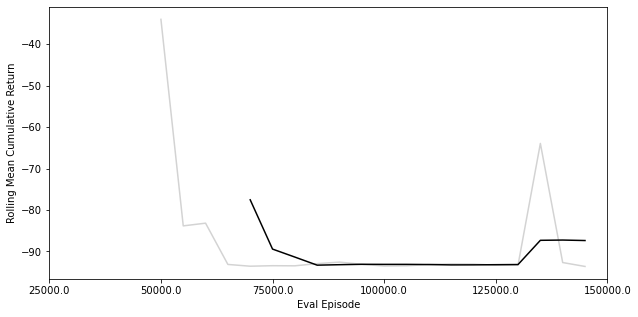

In [30]:
#View the evaluation callback details.
eval_log_path = './logs_CarRacing_ppo/Single_Image/'
evaluation_log = np.load(eval_log_path + 'evaluations.npz')
evaluation_log_df = pd.DataFrame({item: [np.mean(ep) for ep in evaluation_log[item]] for item in evaluation_log.files})
ax = evaluation_log_df.loc[0:len(evaluation_log_df), 'results'].plot(color = 'lightgray', xlim = [-5, len(evaluation_log_df)], figsize = (10,5))
evaluation_log_df['results'].rolling(5).mean().plot(color = 'black', xlim = [-5, len(evaluation_log_df)])
ax.set_xticklabels(evaluation_log_df['timesteps'])
ax.set_xlabel("Eval Episode")
plt.ylabel("Rolling Mean Cumulative Return")
plt.show()

Save the trained agent.

In [14]:
# Add code here
agent.save("./ppo_CarRacing_SingleImage_agent")

For memory management delete old agent and environment (assumes variable names - change if required).

In [15]:
del agent
del env
del eval_env

### Create Image Stack Agent

Create the CarRacing-v0 environment using wrappers to resize the images to 64 x 64 and change to greyscale. Also add a wrapper to create a stack of 4 frames. 

In [16]:
# Add code here
env = gym.make('CarRacing-v0')
env = gym.wrappers.resize_observation.ResizeObservation(env, 64)
env = gym.wrappers.gray_scale_observation.GrayScaleObservation(env, keep_dim = True)
env = sb3.common.monitor.Monitor(env)
env = sb3.common.vec_env.DummyVecEnv([lambda:env])
env = sb3.common.vec_env.VecFrameStack(env, n_stack=4)
print(env.observation_space.shape)


(64, 64, 4)


Create an agent that controls the car using a stack of input image frames as the state input. We recommend a PPO agent with the following hyper-parameters (although you can experiment):
- learning_rate = 3e-5
- n_steps = 512
- ent_coef = 0.001
- batch_size = 128
- gae_lambda =  0.9
- n_epochs = 20
- use_sde = True
- sde_sample_freq = 4
- clip_range = 0.4
- policy_kwargs = {'log_std_init': -2, 'ortho_init':False},

We also recommend enabling **tensorboard** monitoring of the training process.

In [17]:
# Add code here
tb_log = './log_tb_CarRacing_PPO/Image_Stack/'
agent = sb3.PPO('CnnPolicy', 
                env,
                learning_rate = 3e-5,
                n_steps = 512,
                ent_coef = 0.001,
                batch_size = 128,
                gae_lambda = 0.9,
                n_epochs = 20,
                use_sde = True,
                sde_sample_freq = 4,
                clip_range = 0.4,
                policy_kwargs = {'log_std_init': -2, 'ortho_init':False},
                verbose = 1, 
                tensorboard_log = tb_log)

Using cpu device
Wrapping the env in a VecTransposeImage.


Examine the actor and critic network architectures.

In [18]:
# Add code here
print(agent.policy)

ActorCriticCnnPolicy(
  (features_extractor): NatureCNN(
    (cnn): Sequential(
      (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=1024, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (mlp_extractor): MlpExtractor(
    (shared_net): Sequential()
    (policy_net): Sequential()
    (value_net): Sequential()
  )
  (action_net): Linear(in_features=512, out_features=3, bias=True)
  (value_net): Linear(in_features=512, out_features=1, bias=True)
)


Create an evaluation callback that is called every at regular intervals and renders the episode.

In [19]:
# Add code here
eval_env = gym.make('CarRacing-v0')
eval_env = gym.wrappers.resize_observation.ResizeObservation(eval_env, 64)
eval_env = gym.wrappers.gray_scale_observation.GrayScaleObservation(eval_env, keep_dim = True)
eval_env = sb3.common.monitor.Monitor(eval_env)
eval_env = sb3.common.vec_env.DummyVecEnv([lambda:eval_env])
eval_env = sb3.common.vec_env.VecFrameStack(eval_env, n_stack=4)
print(eval_env.observation_space.shape)

eval_log_path = './logs_CarRacing_ppo/Image_Stack/'
eval_callback = sb3.common.callbacks.EvalCallback(eval_env, 
                                                  best_model_save_path = eval_log_path,
                                                  log_path = eval_log_path, 
                                                  eval_freq = int(num_timesteps/num_eval_blocks),
                                                  render = False)

(64, 64, 4)


Train the model for a large number of timesteps (500,000 timesteps will probably work well).

In [20]:
# Add code here
agent.learn(total_timesteps=num_timesteps, 
            callback = eval_callback,
            tb_log_name="CarRacing_PPO_ImageStack")

Track generation: 1105..1393 -> 288-tiles track
Logging to ./log_tb_CarRacing_PPO/Image_Stack/CarRacing_PPO_ImageStack_1


2022-04-25 18:11:04.195 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f98ef7d3a20>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 18:11:04.195 python[62229:2848141] Warning: Expected min height of view: (<NSButton: 0x7f98f8072210>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 18:11:04.197 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f98f80729a0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 18:11:04.198 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f98f8073b20>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
/Users/jiadongli/opt/anacon

----------------------------
| time/              |     |
|    fps             | 206 |
|    iterations      | 1   |
|    time_elapsed    | 2   |
|    total_timesteps | 512 |
----------------------------
Track generation: 1040..1304 -> 264-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -47.7     |
| time/                   |           |
|    fps                  | 75        |
|    iterations           | 2         |
|    time_elapsed         | 13        |
|    total_timesteps      | 1024      |
| train/                  |           |
|    approx_kl            | 0.5043927 |
|    clip_fraction        | 0.305     |
|    clip_range           | 0.4       |
|    entropy_loss         | 2.8       |
|    explained_variance   | 0.000149  |
|    learning_rate        | 3e-05     |
|    loss                 | 0.75      |
|    n_updates            | 20        |
|    policy_gradient_loss | 0

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -28.5       |
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 11          |
|    time_elapsed         | 111         |
|    total_timesteps      | 5632        |
| train/                  |             |
|    approx_kl            | 0.020037794 |
|    clip_fraction        | 0.0422      |
|    clip_range           | 0.4         |
|    entropy_loss         | -7.31       |
|    explained_variance   | 0.744       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.918       |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0059     |
|    std                  | 0.135       |
|    value_loss           | 1.69        |
-----------------------------------------
Track generation: 1276..1599 -> 323-tiles track
----------------------------

Track generation: 1210..1517 -> 307-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -19.6      |
| time/                   |            |
|    fps                  | 48         |
|    iterations           | 20         |
|    time_elapsed         | 209        |
|    total_timesteps      | 10240      |
| train/                  |            |
|    approx_kl            | 0.07801301 |
|    clip_fraction        | 0.249      |
|    clip_range           | 0.4        |
|    entropy_loss         | -8.57      |
|    explained_variance   | 0.446      |
|    learning_rate        | 3e-05      |
|    loss                 | -0.00596   |
|    n_updates            | 380        |
|    policy_gradient_loss | -0.0495    |
|    std                  | 0.135      |
|    value_loss           | 0.166      |
----------------------------------------
-----------------------------------------
| rollou

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -33        |
| time/                   |            |
|    fps                  | 48         |
|    iterations           | 29         |
|    time_elapsed         | 307        |
|    total_timesteps      | 14848      |
| train/                  |            |
|    approx_kl            | 0.07577216 |
|    clip_fraction        | 0.225      |
|    clip_range           | 0.4        |
|    entropy_loss         | -8.69      |
|    explained_variance   | 0.715      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.307      |
|    n_updates            | 560        |
|    policy_gradient_loss | -0.0428    |
|    std                  | 0.135      |
|    value_loss           | 0.695      |
----------------------------------------
Track generation: 1061..1330 -> 269-tiles track
-----------------------------------------
| rollou

Track generation: 1120..1404 -> 284-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -41        |
| time/                   |            |
|    fps                  | 47         |
|    iterations           | 38         |
|    time_elapsed         | 406        |
|    total_timesteps      | 19456      |
| train/                  |            |
|    approx_kl            | 0.11121307 |
|    clip_fraction        | 0.276      |
|    clip_range           | 0.4        |
|    entropy_loss         | -10.2      |
|    explained_variance   | 0.473      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.105      |
|    n_updates            | 740        |
|    policy_gradient_loss | -0.0512    |
|    std                  | 0.134      |
|    value_loss           | 0.423      |
----------------------------------------
----------------------------------------
| rollout

Track generation: 1267..1588 -> 321-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -46.8      |
| time/                   |            |
|    fps                  | 47         |
|    iterations           | 47         |
|    time_elapsed         | 504        |
|    total_timesteps      | 24064      |
| train/                  |            |
|    approx_kl            | 0.06221841 |
|    clip_fraction        | 0.0869     |
|    clip_range           | 0.4        |
|    entropy_loss         | -11.6      |
|    explained_variance   | 0.0163     |
|    learning_rate        | 3e-05      |
|    loss                 | 0.535      |
|    n_updates            | 920        |
|    policy_gradient_loss | -0.0293    |
|    std                  | 0.134      |
|    value_loss           | 1.35       |
----------------------------------------
-----------------------------------------
| rollou

2022-04-25 18:19:49.717 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f98df837130>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 18:19:49.718 python[62229:2848141] Warning: Expected min height of view: (<NSButton: 0x7f98df748a30>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 18:19:49.719 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f98df707f60>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 18:19:49.720 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f98df7301c0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


Track generation: 1075..1348 -> 273-tiles track
Track generation: 1059..1330 -> 271-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1216..1524 -> 308-tiles track
Track generation: 1270..1594 -> 324-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1189..1490 -> 301-tiles track
Track generation: 1227..1536 -> 309-tiles track
Track generation: 1004..1259 -> 255-tiles track
Eval num_timesteps=25000, episode_reward=-82.50 +/- 1.44
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | -82.5       |
| time/                   |             |
|    total_timesteps      | 25000       |
| train/                  |             |
|    approx_kl            | 0.078274734 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.4     

Track generation: 1227..1538 -> 311-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -49.5       |
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 57          |
|    time_elapsed         | 634         |
|    total_timesteps      | 29184       |
| train/                  |             |
|    approx_kl            | 0.053803984 |
|    clip_fraction        | 0.09        |
|    clip_range           | 0.4         |
|    entropy_loss         | -12.2       |
|    explained_variance   | -0.387      |
|    learning_rate        | 3e-05       |
|    loss                 | 0.0216      |
|    n_updates            | 1120        |
|    policy_gradient_loss | -0.014      |
|    std                  | 0.134       |
|    value_loss           | 0.447       |
-----------------------------------------
----------------------------

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -50.5      |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 66         |
|    time_elapsed         | 746        |
|    total_timesteps      | 33792      |
| train/                  |            |
|    approx_kl            | 0.05750806 |
|    clip_fraction        | 0.131      |
|    clip_range           | 0.4        |
|    entropy_loss         | -12        |
|    explained_variance   | 0.744      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.412      |
|    n_updates            | 1300       |
|    policy_gradient_loss | -0.0338    |
|    std                  | 0.134      |
|    value_loss           | 0.897      |
----------------------------------------
Track generation: 1152..1444 -> 292-tiles track
----------------------------------------
| rollout

Track generation: 1132..1419 -> 287-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -53.9       |
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 75          |
|    time_elapsed         | 844         |
|    total_timesteps      | 38400       |
| train/                  |             |
|    approx_kl            | 0.017902661 |
|    clip_fraction        | 0.0114      |
|    clip_range           | 0.4         |
|    entropy_loss         | -12.2       |
|    explained_variance   | 0.0903      |
|    learning_rate        | 3e-05       |
|    loss                 | 0.0174      |
|    n_updates            | 1480        |
|    policy_gradient_loss | -0.00377    |
|    std                  | 0.134       |
|    value_loss           | 0.12        |
-----------------------------------------
----------------------------

Track generation: 1085..1368 -> 283-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -56.8      |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 84         |
|    time_elapsed         | 942        |
|    total_timesteps      | 43008      |
| train/                  |            |
|    approx_kl            | 0.03781178 |
|    clip_fraction        | 0.039      |
|    clip_range           | 0.4        |
|    entropy_loss         | -12        |
|    explained_variance   | 0.918      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.049      |
|    n_updates            | 1660       |
|    policy_gradient_loss | -0.0159    |
|    std                  | 0.134      |
|    value_loss           | 0.157      |
----------------------------------------
-----------------------------------------
| rollou

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -58.6     |
| time/                   |           |
|    fps                  | 30        |
|    iterations           | 93        |
|    time_elapsed         | 1558      |
|    total_timesteps      | 47616     |
| train/                  |           |
|    approx_kl            | 0.0305839 |
|    clip_fraction        | 0.0428    |
|    clip_range           | 0.4       |
|    entropy_loss         | -12.8     |
|    explained_variance   | 0.362     |
|    learning_rate        | 3e-05     |
|    loss                 | 0.0628    |
|    n_updates            | 1840      |
|    policy_gradient_loss | -0.0101   |
|    std                  | 0.134     |
|    value_loss           | 0.382     |
---------------------------------------
Track generation: 1259..1578 -> 319-tiles track
----------------------------------------
| rollout/                |    

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -60.5      |
| time/                   |            |
|    fps                  | 31         |
|    iterations           | 101        |
|    time_elapsed         | 1667       |
|    total_timesteps      | 51712      |
| train/                  |            |
|    approx_kl            | 0.05543691 |
|    clip_fraction        | 0.138      |
|    clip_range           | 0.4        |
|    entropy_loss         | -12.2      |
|    explained_variance   | 0.925      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.00326    |
|    n_updates            | 2000       |
|    policy_gradient_loss | -0.0251    |
|    std                  | 0.134      |
|    value_loss           | 0.165      |
----------------------------------------
Track generation: 1233..1545 -> 312-tiles track
-----------------------------------------
| rollou

Track generation: 1260..1579 -> 319-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -61.3       |
| time/                   |             |
|    fps                  | 31          |
|    iterations           | 110         |
|    time_elapsed         | 1813        |
|    total_timesteps      | 56320       |
| train/                  |             |
|    approx_kl            | 0.022604253 |
|    clip_fraction        | 0.00557     |
|    clip_range           | 0.4         |
|    entropy_loss         | -12.5       |
|    explained_variance   | -0.635      |
|    learning_rate        | 3e-05       |
|    loss                 | -0.0236     |
|    n_updates            | 2180        |
|    policy_gradient_loss | -0.0115     |
|    std                  | 0.134       |
|    value_loss           | 0.0882      |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -61.8       |
| time/                   |             |
|    fps                  | 31          |
|    iterations           | 119         |
|    time_elapsed         | 1911        |
|    total_timesteps      | 60928       |
| train/                  |             |
|    approx_kl            | 0.028898632 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.4         |
|    entropy_loss         | -11.7       |
|    explained_variance   | 0.928       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.0406      |
|    n_updates            | 2360        |
|    policy_gradient_loss | -0.0112     |
|    std                  | 0.134       |
|    value_loss           | 0.218       |
-----------------------------------------
Track generation: 1135..1429 -> 294-tiles track
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -62.3       |
| time/                   |             |
|    fps                  | 29          |
|    iterations           | 128         |
|    time_elapsed         | 2223        |
|    total_timesteps      | 65536       |
| train/                  |             |
|    approx_kl            | 0.029676098 |
|    clip_fraction        | 0.0604      |
|    clip_range           | 0.4         |
|    entropy_loss         | -12.3       |
|    explained_variance   | 0.924       |
|    learning_rate        | 3e-05       |
|    loss                 | -0.000577   |
|    n_updates            | 2540        |
|    policy_gradient_loss | -0.013      |
|    std                  | 0.134       |
|    value_loss           | 0.17        |
-----------------------------------------
Track generation: 1168..1464 -> 296-tiles track
----------------------------

Track generation: 1112..1394 -> 282-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -63.2       |
| time/                   |             |
|    fps                  | 30          |
|    iterations           | 137         |
|    time_elapsed         | 2320        |
|    total_timesteps      | 70144       |
| train/                  |             |
|    approx_kl            | 0.045242354 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.4         |
|    entropy_loss         | -12.3       |
|    explained_variance   | 0.692       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.000546    |
|    n_updates            | 2720        |
|    policy_gradient_loss | -0.0259     |
|    std                  | 0.134       |
|    value_loss           | 0.117       |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -64.2       |
| time/                   |             |
|    fps                  | 19          |
|    iterations           | 146         |
|    time_elapsed         | 3826        |
|    total_timesteps      | 74752       |
| train/                  |             |
|    approx_kl            | 0.021791661 |
|    clip_fraction        | 0.0663      |
|    clip_range           | 0.4         |
|    entropy_loss         | -12.7       |
|    explained_variance   | 0.951       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.0756      |
|    n_updates            | 2900        |
|    policy_gradient_loss | -0.00769    |
|    std                  | 0.134       |
|    value_loss           | 0.174       |
-----------------------------------------
Track generation: 1201..1504 -> 303-tiles track
Track generation: 1100..1379

Track generation: 1316..1649 -> 333-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -65         |
| time/                   |             |
|    fps                  | 20          |
|    iterations           | 155         |
|    time_elapsed         | 3946        |
|    total_timesteps      | 79360       |
| train/                  |             |
|    approx_kl            | 0.047404345 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.4         |
|    entropy_loss         | -12.1       |
|    explained_variance   | 0.438       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.0535      |
|    n_updates            | 3080        |
|    policy_gradient_loss | 0.000374    |
|    std                  | 0.134       |
|    value_loss           | 0.0879      |
-----------------------------------------
----------------------------

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -65.2      |
| time/                   |            |
|    fps                  | 18         |
|    iterations           | 164        |
|    time_elapsed         | 4503       |
|    total_timesteps      | 83968      |
| train/                  |            |
|    approx_kl            | 0.05811698 |
|    clip_fraction        | 0.196      |
|    clip_range           | 0.4        |
|    entropy_loss         | -11.3      |
|    explained_variance   | 0.788      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.47       |
|    n_updates            | 3260       |
|    policy_gradient_loss | -0.0408    |
|    std                  | 0.134      |
|    value_loss           | 1.4        |
----------------------------------------
Track generation: 1109..1394 -> 285-tiles track
retry to generate track (normal if there are not m

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -65.7     |
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 173       |
|    time_elapsed         | 4600      |
|    total_timesteps      | 88576     |
| train/                  |           |
|    approx_kl            | 0.0555035 |
|    clip_fraction        | 0.181     |
|    clip_range           | 0.4       |
|    entropy_loss         | -10.4     |
|    explained_variance   | 0.725     |
|    learning_rate        | 3e-05     |
|    loss                 | 0.0715    |
|    n_updates            | 3440      |
|    policy_gradient_loss | -0.00186  |
|    std                  | 0.134     |
|    value_loss           | 0.344     |
---------------------------------------
Track generation: 1163..1458 -> 295-tiles track
-----------------------------------------
| rollout/                |   

Track generation: 1191..1493 -> 302-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -66.6      |
| time/                   |            |
|    fps                  | 19         |
|    iterations           | 182        |
|    time_elapsed         | 4815       |
|    total_timesteps      | 93184      |
| train/                  |            |
|    approx_kl            | 0.08068498 |
|    clip_fraction        | 0.27       |
|    clip_range           | 0.4        |
|    entropy_loss         | -10        |
|    explained_variance   | 0.34       |
|    learning_rate        | 3e-05      |
|    loss                 | -0.0649    |
|    n_updates            | 3620       |
|    policy_gradient_loss | -0.0432    |
|    std                  | 0.134      |
|    value_loss           | 0.039      |
----------------------------------------
-----------------------------------------
| rollou

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -66.3      |
| time/                   |            |
|    fps                  | 19         |
|    iterations           | 191        |
|    time_elapsed         | 4912       |
|    total_timesteps      | 97792      |
| train/                  |            |
|    approx_kl            | 0.07466987 |
|    clip_fraction        | 0.106      |
|    clip_range           | 0.4        |
|    entropy_loss         | -9.85      |
|    explained_variance   | 0.897      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.0307     |
|    n_updates            | 3800       |
|    policy_gradient_loss | -0.0189    |
|    std                  | 0.134      |
|    value_loss           | 0.279      |
----------------------------------------
Track generation: 1212..1519 -> 307-tiles track
-----------------------------------------
| rollou

Track generation: 1236..1550 -> 314-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -66.7       |
| time/                   |             |
|    fps                  | 18          |
|    iterations           | 200         |
|    time_elapsed         | 5622        |
|    total_timesteps      | 102400      |
| train/                  |             |
|    approx_kl            | 0.050535884 |
|    clip_fraction        | 0.0944      |
|    clip_range           | 0.4         |
|    entropy_loss         | -10.4       |
|    explained_variance   | 0.505       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.21        |
|    n_updates            | 3980        |
|    policy_gradient_loss | -0.0216     |
|    std                  | 0.134       |
|    value_loss           | 0.336       |
-----------------------------------------
----------------------------

Track generation: 1072..1353 -> 281-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -69.8       |
| time/                   |             |
|    fps                  | 18          |
|    iterations           | 209         |
|    time_elapsed         | 5719        |
|    total_timesteps      | 107008      |
| train/                  |             |
|    approx_kl            | 0.055720344 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.4         |
|    entropy_loss         | -9.85       |
|    explained_variance   | 0.879       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.062       |
|    n_updates            | 4160        |
|    policy_gradient_loss | -0.0303     |
|    std                  | 0.134       |
|    value_loss           | 0.254       |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -71.9       |
| time/                   |             |
|    fps                  | 17          |
|    iterations           | 218         |
|    time_elapsed         | 6493        |
|    total_timesteps      | 111616      |
| train/                  |             |
|    approx_kl            | 0.038213577 |
|    clip_fraction        | 0.0479      |
|    clip_range           | 0.4         |
|    entropy_loss         | -9.81       |
|    explained_variance   | 0.773       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.41        |
|    n_updates            | 4340        |
|    policy_gradient_loss | -0.0352     |
|    std                  | 0.134       |
|    value_loss           | 1.16        |
-----------------------------------------
Track generation: 1257..1576 -> 319-tiles track
----------------------------

Track generation: 1101..1385 -> 284-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -71.6      |
| time/                   |            |
|    fps                  | 17         |
|    iterations           | 227        |
|    time_elapsed         | 6590       |
|    total_timesteps      | 116224     |
| train/                  |            |
|    approx_kl            | 0.07173223 |
|    clip_fraction        | 0.129      |
|    clip_range           | 0.4        |
|    entropy_loss         | -9.67      |
|    explained_variance   | 0.812      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.00787    |
|    n_updates            | 4520       |
|    policy_gradient_loss | -0.0301    |
|    std                  | 0.134      |
|    value_loss           | 0.148      |
----------------------------------------
-----------------------------------------
| rollou

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -71.2       |
| time/                   |             |
|    fps                  | 18          |
|    iterations           | 236         |
|    time_elapsed         | 6688        |
|    total_timesteps      | 120832      |
| train/                  |             |
|    approx_kl            | 0.043860115 |
|    clip_fraction        | 0.0509      |
|    clip_range           | 0.4         |
|    entropy_loss         | -9.9        |
|    explained_variance   | 0.819       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.126       |
|    n_updates            | 4700        |
|    policy_gradient_loss | -0.0313     |
|    std                  | 0.134       |
|    value_loss           | 0.669       |
-----------------------------------------
Track generation: 1107..1388 -> 281-tiles track
----------------------------

Track generation: 1083..1360 -> 277-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1099..1383 -> 284-tiles track
Track generation: 1155..1456 -> 301-tiles track
Track generation: 1174..1472 -> 298-tiles track
Track generation: 1158..1451 -> 293-tiles track
Track generation: 1158..1451 -> 293-tiles track
Track generation: 1193..1495 -> 302-tiles track
Track generation: 1333..1671 -> 338-tiles track
Eval num_timesteps=125000, episode_reward=-70.30 +/- 1.43
Episode length: 1000.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1e+03      |
|    mean_reward          | -70.3      |
| time/                   |            |
|    total_timesteps      | 125000     |
| train/                  |            |
|    approx_kl            | 0.04628192 |
|    clip_fraction        | 0.0921     |
|    clip_range           | 0.4        |
|    entropy_loss         | -10.2  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -71         |
| time/                   |             |
|    fps                  | 18          |
|    iterations           | 253         |
|    time_elapsed         | 6931        |
|    total_timesteps      | 129536      |
| train/                  |             |
|    approx_kl            | 0.033955406 |
|    clip_fraction        | 0.0671      |
|    clip_range           | 0.4         |
|    entropy_loss         | -9.83       |
|    explained_variance   | 0.728       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.199       |
|    n_updates            | 5040        |
|    policy_gradient_loss | -0.00711    |
|    std                  | 0.134       |
|    value_loss           | 0.644       |
-----------------------------------------
Track generation: 1150..1450 -> 300-tiles track
----------------------------

Track generation: 1328..1664 -> 336-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -71.7      |
| time/                   |            |
|    fps                  | 18         |
|    iterations           | 262        |
|    time_elapsed         | 7118       |
|    total_timesteps      | 134144     |
| train/                  |            |
|    approx_kl            | 0.06461502 |
|    clip_fraction        | 0.0927     |
|    clip_range           | 0.4        |
|    entropy_loss         | -10.6      |
|    explained_variance   | 0.7        |
|    learning_rate        | 3e-05      |
|    loss                 | 0.0997     |
|    n_updates            | 5220       |
|    policy_gradient_loss | -0.0159    |
|    std                  | 0.134      |
|    value_loss           | 0.0697     |
----------------------------------------
-----------------------------------------
| rollou

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -71.7       |
| time/                   |             |
|    fps                  | 19          |
|    iterations           | 271         |
|    time_elapsed         | 7216        |
|    total_timesteps      | 138752      |
| train/                  |             |
|    approx_kl            | 0.022671562 |
|    clip_fraction        | 0.0473      |
|    clip_range           | 0.4         |
|    entropy_loss         | -11.3       |
|    explained_variance   | 0.948       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.014       |
|    n_updates            | 5400        |
|    policy_gradient_loss | -0.00927    |
|    std                  | 0.134       |
|    value_loss           | 0.113       |
-----------------------------------------
Track generation: 1058..1327 -> 269-tiles track
----------------------------

Track generation: 1218..1527 -> 309-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -71.9       |
| time/                   |             |
|    fps                  | 19          |
|    iterations           | 280         |
|    time_elapsed         | 7315        |
|    total_timesteps      | 143360      |
| train/                  |             |
|    approx_kl            | 0.033715166 |
|    clip_fraction        | 0.268       |
|    clip_range           | 0.4         |
|    entropy_loss         | -10.9       |
|    explained_variance   | 0.373       |
|    learning_rate        | 3e-05       |
|    loss                 | -0.0275     |
|    n_updates            | 5580        |
|    policy_gradient_loss | -0.048      |
|    std                  | 0.134       |
|    value_loss           | 0.0371      |
-----------------------------------------
----------------------------

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -72.1      |
| time/                   |            |
|    fps                  | 19         |
|    iterations           | 289        |
|    time_elapsed         | 7415       |
|    total_timesteps      | 147968     |
| train/                  |            |
|    approx_kl            | 0.03127401 |
|    clip_fraction        | 0.0791     |
|    clip_range           | 0.4        |
|    entropy_loss         | -11.1      |
|    explained_variance   | 0.962      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.00185    |
|    n_updates            | 5760       |
|    policy_gradient_loss | -0.0232    |
|    std                  | 0.134      |
|    value_loss           | 0.0807     |
----------------------------------------
Track generation: 1384..1738 -> 354-tiles track
-----------------------------------------
| rollou

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -72.2      |
| time/                   |            |
|    fps                  | 20         |
|    iterations           | 298        |
|    time_elapsed         | 7539       |
|    total_timesteps      | 152576     |
| train/                  |            |
|    approx_kl            | 0.05361798 |
|    clip_fraction        | 0.225      |
|    clip_range           | 0.4        |
|    entropy_loss         | -10.1      |
|    explained_variance   | 0.827      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.0637     |
|    n_updates            | 5940       |
|    policy_gradient_loss | -0.0443    |
|    std                  | 0.134      |
|    value_loss           | 0.288      |
----------------------------------------
Track generation: 1262..1589 -> 327-tiles track
----------------------------------------
| rollout

Track generation: 1096..1374 -> 278-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -72.6       |
| time/                   |             |
|    fps                  | 20          |
|    iterations           | 307         |
|    time_elapsed         | 7647        |
|    total_timesteps      | 157184      |
| train/                  |             |
|    approx_kl            | 0.029332086 |
|    clip_fraction        | 0.0779      |
|    clip_range           | 0.4         |
|    entropy_loss         | -10.1       |
|    explained_variance   | 0.773       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.000519    |
|    n_updates            | 6120        |
|    policy_gradient_loss | -0.037      |
|    std                  | 0.134       |
|    value_loss           | 0.167       |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -72.8       |
| time/                   |             |
|    fps                  | 20          |
|    iterations           | 316         |
|    time_elapsed         | 7759        |
|    total_timesteps      | 161792      |
| train/                  |             |
|    approx_kl            | 0.033295676 |
|    clip_fraction        | 0.087       |
|    clip_range           | 0.4         |
|    entropy_loss         | -9.91       |
|    explained_variance   | 0.912       |
|    learning_rate        | 3e-05       |
|    loss                 | -0.0199     |
|    n_updates            | 6300        |
|    policy_gradient_loss | -0.0386     |
|    std                  | 0.134       |
|    value_loss           | 0.155       |
-----------------------------------------
Track generation: 1203..1508 -> 305-tiles track
----------------------------

Track generation: 1151..1442 -> 291-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -71.1       |
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 325         |
|    time_elapsed         | 7869        |
|    total_timesteps      | 166400      |
| train/                  |             |
|    approx_kl            | 0.029855162 |
|    clip_fraction        | 0.0956      |
|    clip_range           | 0.4         |
|    entropy_loss         | -9.38       |
|    explained_variance   | 0.554       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.11        |
|    n_updates            | 6480        |
|    policy_gradient_loss | -0.021      |
|    std                  | 0.134       |
|    value_loss           | 0.298       |
-----------------------------------------
----------------------------

Track generation: 1156..1449 -> 293-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -70         |
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 334         |
|    time_elapsed         | 7980        |
|    total_timesteps      | 171008      |
| train/                  |             |
|    approx_kl            | 0.031401858 |
|    clip_fraction        | 0.0815      |
|    clip_range           | 0.4         |
|    entropy_loss         | -9.89       |
|    explained_variance   | 0.841       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.00415     |
|    n_updates            | 6660        |
|    policy_gradient_loss | -0.0198     |
|    std                  | 0.134       |
|    value_loss           | 0.174       |
-----------------------------------------
----------------------------

New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -68.6    |
| time/              |          |
|    fps             | 21       |
|    iterations      | 342      |
|    time_elapsed    | 8105     |
|    total_timesteps | 175104   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -68.6       |
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 343         |
|    time_elapsed         | 8118        |
|    total_timesteps      | 175616      |
| train/                  |             |
|    approx_kl            | 0.044279173 |
|    clip_fraction        | 0.0958      |
|    clip_range           | 0.4         |
|    entropy_loss         | -10.2       |
|    explained_variance   | 0.831       |
|    lea

Track generation: 905..1142 -> 237-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -67.7     |
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 352       |
|    time_elapsed         | 8277      |
|    total_timesteps      | 180224    |
| train/                  |           |
|    approx_kl            | 0.0838456 |
|    clip_fraction        | 0.166     |
|    clip_range           | 0.4       |
|    entropy_loss         | -10.3     |
|    explained_variance   | 0.624     |
|    learning_rate        | 3e-05     |
|    loss                 | 0.272     |
|    n_updates            | 7020      |
|    policy_gradient_loss | -0.0246   |
|    std                  | 0.134     |
|    value_loss           | 0.738     |
---------------------------------------
-----------------------------------------
| rollout/                |    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -68         |
| time/                   |             |
|    fps                  | 22          |
|    iterations           | 361         |
|    time_elapsed         | 8388        |
|    total_timesteps      | 184832      |
| train/                  |             |
|    approx_kl            | 0.032297987 |
|    clip_fraction        | 0.0509      |
|    clip_range           | 0.4         |
|    entropy_loss         | -10.7       |
|    explained_variance   | 0.596       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.525       |
|    n_updates            | 7200        |
|    policy_gradient_loss | -0.0257     |
|    std                  | 0.134       |
|    value_loss           | 1.49        |
-----------------------------------------
Track generation: 1064..1334 -> 270-tiles track
----------------------------

Track generation: 1147..1446 -> 299-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -67.4       |
| time/                   |             |
|    fps                  | 22          |
|    iterations           | 370         |
|    time_elapsed         | 8538        |
|    total_timesteps      | 189440      |
| train/                  |             |
|    approx_kl            | 0.023292802 |
|    clip_fraction        | 0.0631      |
|    clip_range           | 0.4         |
|    entropy_loss         | -11.1       |
|    explained_variance   | 0.535       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.218       |
|    n_updates            | 7380        |
|    policy_gradient_loss | -0.0215     |
|    std                  | 0.134       |
|    value_loss           | 0.772       |
-----------------------------------------
----------------------------

Track generation: 1102..1382 -> 280-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -65.3     |
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 379       |
|    time_elapsed         | 8650      |
|    total_timesteps      | 194048    |
| train/                  |           |
|    approx_kl            | 0.0895446 |
|    clip_fraction        | 0.177     |
|    clip_range           | 0.4       |
|    entropy_loss         | -11.2     |
|    explained_variance   | 0.878     |
|    learning_rate        | 3e-05     |
|    loss                 | 0.00461   |
|    n_updates            | 7560      |
|    policy_gradient_loss | -0.0308   |
|    std                  | 0.134     |
|    value_loss           | 0.451     |
---------------------------------------
----------------------------------------
| rollout/                |    

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -64.2      |
| time/                   |            |
|    fps                  | 22         |
|    iterations           | 388        |
|    time_elapsed         | 8818       |
|    total_timesteps      | 198656     |
| train/                  |            |
|    approx_kl            | 0.04438086 |
|    clip_fraction        | 0.101      |
|    clip_range           | 0.4        |
|    entropy_loss         | -11.1      |
|    explained_variance   | 0.908      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.169      |
|    n_updates            | 7740       |
|    policy_gradient_loss | -0.0425    |
|    std                  | 0.133      |
|    value_loss           | 0.816      |
----------------------------------------
Track generation: 996..1251 -> 255-tiles track
retry to generate track (normal if there are not ma

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -61.4      |
| time/                   |            |
|    fps                  | 22         |
|    iterations           | 396        |
|    time_elapsed         | 8930       |
|    total_timesteps      | 202752     |
| train/                  |            |
|    approx_kl            | 0.05608837 |
|    clip_fraction        | 0.092      |
|    clip_range           | 0.4        |
|    entropy_loss         | -11.5      |
|    explained_variance   | 0.943      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.487      |
|    n_updates            | 7900       |
|    policy_gradient_loss | -0.0133    |
|    std                  | 0.133      |
|    value_loss           | 2.08       |
----------------------------------------
Track generation: 1118..1408 -> 290-tiles track
-----------------------------------------
| rollou

Track generation: 1111..1393 -> 282-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -55.2      |
| time/                   |            |
|    fps                  | 22         |
|    iterations           | 405        |
|    time_elapsed         | 9039       |
|    total_timesteps      | 207360     |
| train/                  |            |
|    approx_kl            | 0.09470824 |
|    clip_fraction        | 0.219      |
|    clip_range           | 0.4        |
|    entropy_loss         | -11.9      |
|    explained_variance   | 0.383      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.0303     |
|    n_updates            | 8080       |
|    policy_gradient_loss | -0.0366    |
|    std                  | 0.133      |
|    value_loss           | 0.346      |
----------------------------------------
----------------------------------------
| rollout

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -52.7       |
| time/                   |             |
|    fps                  | 23          |
|    iterations           | 414         |
|    time_elapsed         | 9186        |
|    total_timesteps      | 211968      |
| train/                  |             |
|    approx_kl            | 0.058659375 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.4         |
|    entropy_loss         | -11.4       |
|    explained_variance   | 0.873       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.9         |
|    n_updates            | 8260        |
|    policy_gradient_loss | -0.0198     |
|    std                  | 0.133       |
|    value_loss           | 2.54        |
-----------------------------------------
Track generation: 1218..1527 -> 309-tiles track
----------------------------

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -52.1     |
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 423       |
|    time_elapsed         | 9296      |
|    total_timesteps      | 216576    |
| train/                  |           |
|    approx_kl            | 0.0623068 |
|    clip_fraction        | 0.134     |
|    clip_range           | 0.4       |
|    entropy_loss         | -11.1     |
|    explained_variance   | 0.905     |
|    learning_rate        | 3e-05     |
|    loss                 | 0.487     |
|    n_updates            | 8440      |
|    policy_gradient_loss | -0.0361   |
|    std                  | 0.133     |
|    value_loss           | 1.49      |
---------------------------------------
Track generation: 1250..1565 -> 315-tiles track
-----------------------------------------
| rollout/                |   

Track generation: 1088..1364 -> 276-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -49.5       |
| time/                   |             |
|    fps                  | 23          |
|    iterations           | 432         |
|    time_elapsed         | 9460        |
|    total_timesteps      | 221184      |
| train/                  |             |
|    approx_kl            | 0.060739636 |
|    clip_fraction        | 0.0796      |
|    clip_range           | 0.4         |
|    entropy_loss         | -11.1       |
|    explained_variance   | 0.653       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.264       |
|    n_updates            | 8620        |
|    policy_gradient_loss | -0.0446     |
|    std                  | 0.133       |
|    value_loss           | 1.41        |
-----------------------------------------
----------------------------

New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -47.2    |
| time/              |          |
|    fps             | 23       |
|    iterations      | 440      |
|    time_elapsed    | 9580     |
|    total_timesteps | 225280   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -47.2       |
| time/                   |             |
|    fps                  | 23          |
|    iterations           | 441         |
|    time_elapsed         | 9592        |
|    total_timesteps      | 225792      |
| train/                  |             |
|    approx_kl            | 0.018087497 |
|    clip_fraction        | 0.0234      |
|    clip_range           | 0.4         |
|    entropy_loss         | -10.7       |
|    explained_variance   | 0.922       |
|    lea

Track generation: 1031..1302 -> 271-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -43.1       |
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 450         |
|    time_elapsed         | 10501       |
|    total_timesteps      | 230400      |
| train/                  |             |
|    approx_kl            | 0.028218366 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.4         |
|    entropy_loss         | -11.3       |
|    explained_variance   | 0.0167      |
|    learning_rate        | 3e-05       |
|    loss                 | 0.0118      |
|    n_updates            | 8980        |
|    policy_gradient_loss | -0.0109     |
|    std                  | 0.133       |
|    value_loss           | 0.224       |
-----------------------------------------
----------------------------

Track generation: 1291..1618 -> 327-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -42.4     |
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 459       |
|    time_elapsed         | 10607     |
|    total_timesteps      | 235008    |
| train/                  |           |
|    approx_kl            | 0.0563478 |
|    clip_fraction        | 0.133     |
|    clip_range           | 0.4       |
|    entropy_loss         | -10.9     |
|    explained_variance   | 0.912     |
|    learning_rate        | 3e-05     |
|    loss                 | 0.0879    |
|    n_updates            | 9160      |
|    policy_gradient_loss | -0.0259   |
|    std                  | 0.133     |
|    value_loss           | 0.43      |
---------------------------------------
----------------------------------------
| rollout/                |    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -40.3       |
| time/                   |             |
|    fps                  | 22          |
|    iterations           | 468         |
|    time_elapsed         | 10715       |
|    total_timesteps      | 239616      |
| train/                  |             |
|    approx_kl            | 0.046381317 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.4         |
|    entropy_loss         | -10.3       |
|    explained_variance   | 0.933       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.405       |
|    n_updates            | 9340        |
|    policy_gradient_loss | -0.0283     |
|    std                  | 0.133       |
|    value_loss           | 1.06        |
-----------------------------------------
Track generation: 995..1256 -> 261-tiles track
-----------------------------

Track generation: 1042..1314 -> 272-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -36.4      |
| time/                   |            |
|    fps                  | 22         |
|    iterations           | 477        |
|    time_elapsed         | 10825      |
|    total_timesteps      | 244224     |
| train/                  |            |
|    approx_kl            | 0.12772895 |
|    clip_fraction        | 0.198      |
|    clip_range           | 0.4        |
|    entropy_loss         | -11.1      |
|    explained_variance   | 0.871      |
|    learning_rate        | 3e-05      |
|    loss                 | 0.112      |
|    n_updates            | 9520       |
|    policy_gradient_loss | -0.0221    |
|    std                  | 0.133      |
|    value_loss           | 0.293      |
----------------------------------------
-----------------------------------------
| rollou

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -34.3       |
| time/                   |             |
|    fps                  | 22          |
|    iterations           | 486         |
|    time_elapsed         | 10936       |
|    total_timesteps      | 248832      |
| train/                  |             |
|    approx_kl            | 0.062353242 |
|    clip_fraction        | 0.0936      |
|    clip_range           | 0.4         |
|    entropy_loss         | -11.2       |
|    explained_variance   | 0.961       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.935       |
|    n_updates            | 9700        |
|    policy_gradient_loss | -0.00991    |
|    std                  | 0.133       |
|    value_loss           | 1.35        |
-----------------------------------------
Track generation: 1096..1374 -> 278-tiles track
----------------------------

Track generation: 1135..1432 -> 297-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -31.6       |
| time/                   |             |
|    fps                  | 22          |
|    iterations           | 495         |
|    time_elapsed         | 11072       |
|    total_timesteps      | 253440      |
| train/                  |             |
|    approx_kl            | 0.053966805 |
|    clip_fraction        | 0.0463      |
|    clip_range           | 0.4         |
|    entropy_loss         | -11.4       |
|    explained_variance   | 0.359       |
|    learning_rate        | 3e-05       |
|    loss                 | -0.0149     |
|    n_updates            | 9880        |
|    policy_gradient_loss | -0.0163     |
|    std                  | 0.133       |
|    value_loss           | 0.123       |
-----------------------------------------
----------------------------

--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 994      |
|    ep_rew_mean          | -21.7    |
| time/                   |          |
|    fps                  | 23       |
|    iterations           | 504      |
|    time_elapsed         | 11187    |
|    total_timesteps      | 258048   |
| train/                  |          |
|    approx_kl            | 1.961068 |
|    clip_fraction        | 0.717    |
|    clip_range           | 0.4      |
|    entropy_loss         | -12.2    |
|    explained_variance   | 0.501    |
|    learning_rate        | 3e-05    |
|    loss                 | 15.6     |
|    n_updates            | 10060    |
|    policy_gradient_loss | 0.0428   |
|    std                  | 0.133    |
|    value_loss           | 74.7     |
--------------------------------------
Track generation: 1085..1360 -> 275-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_le

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 991       |
|    ep_rew_mean          | -19.4     |
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 513       |
|    time_elapsed         | 11305     |
|    total_timesteps      | 262656    |
| train/                  |           |
|    approx_kl            | 1.1970562 |
|    clip_fraction        | 0.642     |
|    clip_range           | 0.4       |
|    entropy_loss         | -14       |
|    explained_variance   | 0.354     |
|    learning_rate        | 3e-05     |
|    loss                 | 31.9      |
|    n_updates            | 10240     |
|    policy_gradient_loss | 0.0492    |
|    std                  | 0.133     |
|    value_loss           | 44.7      |
---------------------------------------
Track generation: 990..1245 -> 255-tiles track
retry to generate track (normal if there are not manyinstances of this me

Track generation: 1068..1339 -> 271-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 991       |
|    ep_rew_mean          | -17.5     |
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 522       |
|    time_elapsed         | 11425     |
|    total_timesteps      | 267264    |
| train/                  |           |
|    approx_kl            | 0.0749314 |
|    clip_fraction        | 0.113     |
|    clip_range           | 0.4       |
|    entropy_loss         | -14.2     |
|    explained_variance   | 0.784     |
|    learning_rate        | 3e-05     |
|    loss                 | 0.449     |
|    n_updates            | 10420     |
|    policy_gradient_loss | 0.0038    |
|    std                  | 0.133     |
|    value_loss           | 2.29      |
---------------------------------------
-----------------------------------------
| rollout/                |   

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 983       |
|    ep_rew_mean          | -15.7     |
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 531       |
|    time_elapsed         | 11542     |
|    total_timesteps      | 271872    |
| train/                  |           |
|    approx_kl            | 1.3401089 |
|    clip_fraction        | 0.69      |
|    clip_range           | 0.4       |
|    entropy_loss         | -14.8     |
|    explained_variance   | 0.579     |
|    learning_rate        | 3e-05     |
|    loss                 | 10.6      |
|    n_updates            | 10600     |
|    policy_gradient_loss | 0.0279    |
|    std                  | 0.133     |
|    value_loss           | 30.2      |
---------------------------------------
Track generation: 1209..1515 -> 306-tiles track
-----------------------------------------
| rollout/                |   

Track generation: 1014..1277 -> 263-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | -13.9       |
| time/                   |             |
|    fps                  | 23          |
|    iterations           | 540         |
|    time_elapsed         | 11686       |
|    total_timesteps      | 276480      |
| train/                  |             |
|    approx_kl            | 0.048404187 |
|    clip_fraction        | 0.0642      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.2       |
|    explained_variance   | -0.38       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.0987      |
|    n_updates            | 10780       |
|    policy_gradient_loss | -0.0141     |
|    std                  | 0.133       |
|    value_loss           | 0.324       |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | -7.67       |
| time/                   |             |
|    fps                  | 23          |
|    iterations           | 549         |
|    time_elapsed         | 11802       |
|    total_timesteps      | 281088      |
| train/                  |             |
|    approx_kl            | 0.035196107 |
|    clip_fraction        | 0.0309      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.4       |
|    explained_variance   | 0.967       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.798       |
|    n_updates            | 10960       |
|    policy_gradient_loss | -0.0175     |
|    std                  | 0.133       |
|    value_loss           | 2.42        |
-----------------------------------------
Track generation: 1265..1585 -> 320-tiles track
Track generation: 1140..1429

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 970          |
|    ep_rew_mean          | -2.5         |
| time/                   |              |
|    fps                  | 23           |
|    iterations           | 558          |
|    time_elapsed         | 11919        |
|    total_timesteps      | 285696       |
| train/                  |              |
|    approx_kl            | 0.0049478197 |
|    clip_fraction        | 0            |
|    clip_range           | 0.4          |
|    entropy_loss         | -15.9        |
|    explained_variance   | 0.765        |
|    learning_rate        | 3e-05        |
|    loss                 | 6.02         |
|    n_updates            | 11140        |
|    policy_gradient_loss | -0.00425     |
|    std                  | 0.133        |
|    value_loss           | 10.9         |
------------------------------------------
Track generation: 1311..1643 -> 332-tiles track
------

Track generation: 1163..1458 -> 295-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 970        |
|    ep_rew_mean          | 3.11       |
| time/                   |            |
|    fps                  | 24         |
|    iterations           | 567        |
|    time_elapsed         | 12037      |
|    total_timesteps      | 290304     |
| train/                  |            |
|    approx_kl            | 0.02183099 |
|    clip_fraction        | 0.0121     |
|    clip_range           | 0.4        |
|    entropy_loss         | -15.8      |
|    explained_variance   | 0.783      |
|    learning_rate        | 3e-05      |
|    loss                 | 2.72       |
|    n_updates            | 11320      |
|    policy_gradient_loss | -0.00832   |
|    std                  | 0.133      |
|    value_loss           | 7.16       |
----------------------------------------
-----------------------------------------
| rollou

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 970          |
|    ep_rew_mean          | 8.55         |
| time/                   |              |
|    fps                  | 24           |
|    iterations           | 576          |
|    time_elapsed         | 12155        |
|    total_timesteps      | 294912       |
| train/                  |              |
|    approx_kl            | 0.0010872359 |
|    clip_fraction        | 0            |
|    clip_range           | 0.4          |
|    entropy_loss         | -15.9        |
|    explained_variance   | 0.83         |
|    learning_rate        | 3e-05        |
|    loss                 | 3.73         |
|    n_updates            | 11500        |
|    policy_gradient_loss | -0.00102     |
|    std                  | 0.133        |
|    value_loss           | 6.9          |
------------------------------------------
Track generation: 1155..1448 -> 293-tiles track
------

Track generation: 1164..1468 -> 304-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 970         |
|    ep_rew_mean          | 12.2        |
| time/                   |             |
|    fps                  | 24          |
|    iterations           | 585         |
|    time_elapsed         | 12271       |
|    total_timesteps      | 299520      |
| train/                  |             |
|    approx_kl            | 0.067112714 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.6       |
|    explained_variance   | 0.703       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.63        |
|    n_updates            | 11680       |
|    policy_gradient_loss | -0.00287    |
|    std                  | 0.133       |
|    value_loss           | 4.95        |
-----------------------------------------
Track generation: 1028..1289

Track generation: 1207..1513 -> 306-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 970         |
|    ep_rew_mean          | 16.4        |
| time/                   |             |
|    fps                  | 24          |
|    iterations           | 594         |
|    time_elapsed         | 12408       |
|    total_timesteps      | 304128      |
| train/                  |             |
|    approx_kl            | 0.037850074 |
|    clip_fraction        | 0.0462      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.6       |
|    explained_variance   | 0.911       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.62        |
|    n_updates            | 11860       |
|    policy_gradient_loss | -0.0244     |
|    std                  | 0.133       |
|    value_loss           | 4.18        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 968         |
|    ep_rew_mean          | 17.5        |
| time/                   |             |
|    fps                  | 24          |
|    iterations           | 603         |
|    time_elapsed         | 12519       |
|    total_timesteps      | 308736      |
| train/                  |             |
|    approx_kl            | 0.008379561 |
|    clip_fraction        | 0.00527     |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.7       |
|    explained_variance   | 0.928       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.26        |
|    n_updates            | 12040       |
|    policy_gradient_loss | -0.0034     |
|    std                  | 0.133       |
|    value_loss           | 4.93        |
-----------------------------------------
Track generation: 1136..1424 -> 288-tiles track
Track generation: 1083..1357

Track generation: 1157..1450 -> 293-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 961        |
|    ep_rew_mean          | 22.5       |
| time/                   |            |
|    fps                  | 24         |
|    iterations           | 612        |
|    time_elapsed         | 12627      |
|    total_timesteps      | 313344     |
| train/                  |            |
|    approx_kl            | 0.05432668 |
|    clip_fraction        | 0.0989     |
|    clip_range           | 0.4        |
|    entropy_loss         | -15.8      |
|    explained_variance   | 0.679      |
|    learning_rate        | 3e-05      |
|    loss                 | 3.39       |
|    n_updates            | 12220      |
|    policy_gradient_loss | -0.00551   |
|    std                  | 0.133      |
|    value_loss           | 8.51       |
----------------------------------------
-----------------------------------------
| rollou

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 961         |
|    ep_rew_mean          | 30.5        |
| time/                   |             |
|    fps                  | 24          |
|    iterations           | 621         |
|    time_elapsed         | 12737       |
|    total_timesteps      | 317952      |
| train/                  |             |
|    approx_kl            | 0.037809942 |
|    clip_fraction        | 0.0437      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.3       |
|    explained_variance   | 0.532       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.88        |
|    n_updates            | 12400       |
|    policy_gradient_loss | -0.00968    |
|    std                  | 0.133       |
|    value_loss           | 6.17        |
-----------------------------------------
Track generation: 1226..1537 -> 311-tiles track
----------------------------

Track generation: 1311..1643 -> 332-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 961         |
|    ep_rew_mean          | 38.4        |
| time/                   |             |
|    fps                  | 25          |
|    iterations           | 630         |
|    time_elapsed         | 12848       |
|    total_timesteps      | 322560      |
| train/                  |             |
|    approx_kl            | 0.039131336 |
|    clip_fraction        | 0.0373      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.2       |
|    explained_variance   | 0.761       |
|    learning_rate        | 3e-05       |
|    loss                 | 3.38        |
|    n_updates            | 12580       |
|    policy_gradient_loss | -0.0205     |
|    std                  | 0.133       |
|    value_loss           | 8.8         |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 961         |
|    ep_rew_mean          | 46.5        |
| time/                   |             |
|    fps                  | 25          |
|    iterations           | 638         |
|    time_elapsed         | 12971       |
|    total_timesteps      | 326656      |
| train/                  |             |
|    approx_kl            | 0.025502643 |
|    clip_fraction        | 0.0242      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.1       |
|    explained_variance   | 0.759       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.65        |
|    n_updates            | 12740       |
|    policy_gradient_loss | -0.00703    |
|    std                  | 0.133       |
|    value_loss           | 7.54        |
-----------------------------------------
Track generation: 1107..1388 -> 281-tiles track
----------------------------

Track generation: 1032..1301 -> 269-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 959         |
|    ep_rew_mean          | 52.1        |
| time/                   |             |
|    fps                  | 25          |
|    iterations           | 647         |
|    time_elapsed         | 13079       |
|    total_timesteps      | 331264      |
| train/                  |             |
|    approx_kl            | 0.031289686 |
|    clip_fraction        | 0.00879     |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.6       |
|    explained_variance   | 0.578       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.3         |
|    n_updates            | 12920       |
|    policy_gradient_loss | -0.00242    |
|    std                  | 0.133       |
|    value_loss           | 0.689       |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 959         |
|    ep_rew_mean          | 56.6        |
| time/                   |             |
|    fps                  | 25          |
|    iterations           | 656         |
|    time_elapsed         | 13184       |
|    total_timesteps      | 335872      |
| train/                  |             |
|    approx_kl            | 0.050082803 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.4       |
|    explained_variance   | 0.947       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.62        |
|    n_updates            | 13100       |
|    policy_gradient_loss | -0.0237     |
|    std                  | 0.133       |
|    value_loss           | 3.81        |
-----------------------------------------
Track generation: 1254..1572 -> 318-tiles track
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 959         |
|    ep_rew_mean          | 62          |
| time/                   |             |
|    fps                  | 25          |
|    iterations           | 665         |
|    time_elapsed         | 13288       |
|    total_timesteps      | 340480      |
| train/                  |             |
|    approx_kl            | 0.014646631 |
|    clip_fraction        | 0.00488     |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.4       |
|    explained_variance   | 0.931       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.72        |
|    n_updates            | 13280       |
|    policy_gradient_loss | -0.0119     |
|    std                  | 0.133       |
|    value_loss           | 3.81        |
-----------------------------------------
Track generation: 1099..1378 -> 279-tiles track
----------------------------

Track generation: 1012..1269 -> 257-tiles track
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 959          |
|    ep_rew_mean          | 66.5         |
| time/                   |              |
|    fps                  | 25           |
|    iterations           | 674          |
|    time_elapsed         | 13387        |
|    total_timesteps      | 345088       |
| train/                  |              |
|    approx_kl            | 0.0063276654 |
|    clip_fraction        | 0.00566      |
|    clip_range           | 0.4          |
|    entropy_loss         | -16.2        |
|    explained_variance   | 0.938        |
|    learning_rate        | 3e-05        |
|    loss                 | 2.2          |
|    n_updates            | 13460        |
|    policy_gradient_loss | -0.000202    |
|    std                  | 0.133        |
|    value_loss           | 4.49         |
------------------------------------------
------

Track generation: 1153..1454 -> 301-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 956         |
|    ep_rew_mean          | 71.9        |
| time/                   |             |
|    fps                  | 25          |
|    iterations           | 683         |
|    time_elapsed         | 13486       |
|    total_timesteps      | 349696      |
| train/                  |             |
|    approx_kl            | 0.045599397 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.4         |
|    entropy_loss         | -16         |
|    explained_variance   | 0.866       |
|    learning_rate        | 3e-05       |
|    loss                 | 3.33        |
|    n_updates            | 13640       |
|    policy_gradient_loss | -0.0171     |
|    std                  | 0.133       |
|    value_loss           | 9.38        |
-----------------------------------------
Track generation: 1276..1599

Track generation: 1265..1586 -> 321-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 955         |
|    ep_rew_mean          | 73.2        |
| time/                   |             |
|    fps                  | 26          |
|    iterations           | 692         |
|    time_elapsed         | 13609       |
|    total_timesteps      | 354304      |
| train/                  |             |
|    approx_kl            | 0.020539906 |
|    clip_fraction        | 0.00723     |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.6       |
|    explained_variance   | 0.79        |
|    learning_rate        | 3e-05       |
|    loss                 | 2.09        |
|    n_updates            | 13820       |
|    policy_gradient_loss | -0.00837    |
|    std                  | 0.133       |
|    value_loss           | 4.93        |
-----------------------------------------
----------------------------

Track generation: 1180..1480 -> 300-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 954         |
|    ep_rew_mean          | 81          |
| time/                   |             |
|    fps                  | 26          |
|    iterations           | 701         |
|    time_elapsed         | 13777       |
|    total_timesteps      | 358912      |
| train/                  |             |
|    approx_kl            | 0.018721525 |
|    clip_fraction        | 0.0359      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.9       |
|    explained_variance   | 0.894       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.11        |
|    n_updates            | 14000       |
|    policy_gradient_loss | -0.0192     |
|    std                  | 0.133       |
|    value_loss           | 4.67        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 954         |
|    ep_rew_mean          | 87.6        |
| time/                   |             |
|    fps                  | 26          |
|    iterations           | 710         |
|    time_elapsed         | 13875       |
|    total_timesteps      | 363520      |
| train/                  |             |
|    approx_kl            | 0.038142607 |
|    clip_fraction        | 0.0548      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.7       |
|    explained_variance   | 0.892       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.82        |
|    n_updates            | 14180       |
|    policy_gradient_loss | -0.012      |
|    std                  | 0.133       |
|    value_loss           | 5.38        |
-----------------------------------------
Track generation: 1099..1388 -> 289-tiles track
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 962         |
|    ep_rew_mean          | 98.8        |
| time/                   |             |
|    fps                  | 26          |
|    iterations           | 719         |
|    time_elapsed         | 13973       |
|    total_timesteps      | 368128      |
| train/                  |             |
|    approx_kl            | 0.016716141 |
|    clip_fraction        | 0.0332      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.5       |
|    explained_variance   | 0.812       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.47        |
|    n_updates            | 14360       |
|    policy_gradient_loss | 0.000551    |
|    std                  | 0.133       |
|    value_loss           | 8.68        |
-----------------------------------------
Track generation: 1067..1341 -> 274-tiles track
retry to generate track (nor

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 956         |
|    ep_rew_mean          | 105         |
| time/                   |             |
|    fps                  | 26          |
|    iterations           | 728         |
|    time_elapsed         | 14074       |
|    total_timesteps      | 372736      |
| train/                  |             |
|    approx_kl            | 0.056275334 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.5       |
|    explained_variance   | 0.945       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.706       |
|    n_updates            | 14540       |
|    policy_gradient_loss | -0.0187     |
|    std                  | 0.133       |
|    value_loss           | 4.31        |
-----------------------------------------
Track generation: 1115..1398 -> 283-tiles track
----------------------------

Track generation: 1101..1384 -> 283-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1232..1544 -> 312-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 956        |
|    ep_rew_mean          | 105        |
| time/                   |            |
|    fps                  | 26         |
|    iterations           | 737        |
|    time_elapsed         | 14194      |
|    total_timesteps      | 377344     |
| train/                  |            |
|    approx_kl            | 0.04689873 |
|    clip_fraction        | 0.0697     |
|    clip_range           | 0.4        |
|    entropy_loss         | -14.9      |
|    explained_variance   | 0.896      |
|    learning_rate        | 3e-05      |
|    loss                 | 2.63       |
|    n_updates            | 14720      |
|    policy_gradient_loss | -0.0226    |
|    std                  | 0.133      |
|   

Track generation: 1221..1530 -> 309-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 969         |
|    ep_rew_mean          | 110         |
| time/                   |             |
|    fps                  | 26          |
|    iterations           | 746         |
|    time_elapsed         | 14293       |
|    total_timesteps      | 381952      |
| train/                  |             |
|    approx_kl            | 0.022982663 |
|    clip_fraction        | 0.0387      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.4       |
|    explained_variance   | 0.978       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.38        |
|    n_updates            | 14900       |
|    policy_gradient_loss | -0.00636    |
|    std                  | 0.133       |
|    value_loss           | 3.56        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 969         |
|    ep_rew_mean          | 115         |
| time/                   |             |
|    fps                  | 26          |
|    iterations           | 755         |
|    time_elapsed         | 14391       |
|    total_timesteps      | 386560      |
| train/                  |             |
|    approx_kl            | 0.037470624 |
|    clip_fraction        | 0.0475      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.4       |
|    explained_variance   | 0.986       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.546       |
|    n_updates            | 15080       |
|    policy_gradient_loss | -0.00436    |
|    std                  | 0.133       |
|    value_loss           | 2.08        |
-----------------------------------------
Track generation: 1221..1530 -> 309-tiles track
----------------------------

Track generation: 1207..1513 -> 306-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 967         |
|    ep_rew_mean          | 119         |
| time/                   |             |
|    fps                  | 26          |
|    iterations           | 764         |
|    time_elapsed         | 14490       |
|    total_timesteps      | 391168      |
| train/                  |             |
|    approx_kl            | 0.061636046 |
|    clip_fraction        | 0.0533      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.3       |
|    explained_variance   | 0.906       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.562       |
|    n_updates            | 15260       |
|    policy_gradient_loss | -0.00366    |
|    std                  | 0.133       |
|    value_loss           | 1.71        |
-----------------------------------------
----------------------------

Track generation: 1371..1718 -> 347-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 967         |
|    ep_rew_mean          | 128         |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 773         |
|    time_elapsed         | 14590       |
|    total_timesteps      | 395776      |
| train/                  |             |
|    approx_kl            | 0.008890308 |
|    clip_fraction        | 0.0279      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15         |
|    explained_variance   | 0.922       |
|    learning_rate        | 3e-05       |
|    loss                 | 3.21        |
|    n_updates            | 15440       |
|    policy_gradient_loss | 0.00794     |
|    std                  | 0.133       |
|    value_loss           | 10.3        |
-----------------------------------------
----------------------------

Track generation: 1168..1464 -> 296-tiles track
Track generation: 1424..1784 -> 360-tiles track
Track generation: 1092..1378 -> 286-tiles track
Track generation: 1335..1673 -> 338-tiles track
Track generation: 1104..1384 -> 280-tiles track
Track generation: 1147..1438 -> 291-tiles track
Eval num_timesteps=400000, episode_reward=-31.95 +/- 32.02
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | -31.9       |
| time/                   |             |
|    total_timesteps      | 400000      |
| train/                  |             |
|    approx_kl            | 0.014864453 |
|    clip_fraction        | 0.00107     |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.1       |
|    explained_variance   | 0.973       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.51        |
|    n_updates            | 1562

Track generation: 1222..1531 -> 309-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 970         |
|    ep_rew_mean          | 144         |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 791         |
|    time_elapsed         | 14969       |
|    total_timesteps      | 404992      |
| train/                  |             |
|    approx_kl            | 0.006730496 |
|    clip_fraction        | 0.00313     |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.9       |
|    explained_variance   | 0.931       |
|    learning_rate        | 3e-05       |
|    loss                 | 3.24        |
|    n_updates            | 15800       |
|    policy_gradient_loss | 0.00129     |
|    std                  | 0.133       |
|    value_loss           | 7.35        |
-----------------------------------------
----------------------------

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 976        |
|    ep_rew_mean          | 156        |
| time/                   |            |
|    fps                  | 27         |
|    iterations           | 800        |
|    time_elapsed         | 15068      |
|    total_timesteps      | 409600     |
| train/                  |            |
|    approx_kl            | 0.05389035 |
|    clip_fraction        | 0.115      |
|    clip_range           | 0.4        |
|    entropy_loss         | -14.7      |
|    explained_variance   | 0.141      |
|    learning_rate        | 3e-05      |
|    loss                 | 2.15       |
|    n_updates            | 15980      |
|    policy_gradient_loss | -0.0229    |
|    std                  | 0.133      |
|    value_loss           | 4.89       |
----------------------------------------
Track generation: 1269..1596 -> 327-tiles track
-----------------------------------------
| rollou

Track generation: 1167..1463 -> 296-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 976         |
|    ep_rew_mean          | 170         |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 809         |
|    time_elapsed         | 15167       |
|    total_timesteps      | 414208      |
| train/                  |             |
|    approx_kl            | 0.050264187 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.7       |
|    explained_variance   | 0.85        |
|    learning_rate        | 3e-05       |
|    loss                 | 1.3         |
|    n_updates            | 16160       |
|    policy_gradient_loss | -0.0232     |
|    std                  | 0.133       |
|    value_loss           | 3.81        |
-----------------------------------------
----------------------------

Track generation: 1072..1344 -> 272-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 976        |
|    ep_rew_mean          | 183        |
| time/                   |            |
|    fps                  | 27         |
|    iterations           | 818        |
|    time_elapsed         | 15267      |
|    total_timesteps      | 418816     |
| train/                  |            |
|    approx_kl            | 0.02777121 |
|    clip_fraction        | 0.103      |
|    clip_range           | 0.4        |
|    entropy_loss         | -14.7      |
|    explained_variance   | -0.374     |
|    learning_rate        | 3e-05      |
|    loss                 | 1.05       |
|    n_updates            | 16340      |
|    policy_gradient_loss | -0.017     |
|    std                  | 0.133      |
|    value_loss           | 3.26       |
----------------------------------------
-----------------------------------------
| rollou

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 976         |
|    ep_rew_mean          | 188         |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 827         |
|    time_elapsed         | 15366       |
|    total_timesteps      | 423424      |
| train/                  |             |
|    approx_kl            | 0.015082753 |
|    clip_fraction        | 0.0238      |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.8       |
|    explained_variance   | 0.607       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.92        |
|    n_updates            | 16520       |
|    policy_gradient_loss | -0.0019     |
|    std                  | 0.133       |
|    value_loss           | 4.59        |
-----------------------------------------
Track generation: 1475..1848 -> 373-tiles track
----------------------------

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 978        |
|    ep_rew_mean          | 195        |
| time/                   |            |
|    fps                  | 27         |
|    iterations           | 835        |
|    time_elapsed         | 15476      |
|    total_timesteps      | 427520     |
| train/                  |            |
|    approx_kl            | 0.08640684 |
|    clip_fraction        | 0.167      |
|    clip_range           | 0.4        |
|    entropy_loss         | -14.9      |
|    explained_variance   | 0.938      |
|    learning_rate        | 3e-05      |
|    loss                 | 2.15       |
|    n_updates            | 16680      |
|    policy_gradient_loss | -0.023     |
|    std                  | 0.133      |
|    value_loss           | 5.52       |
----------------------------------------
Track generation: 1201..1506 -> 305-tiles track
-----------------------------------------
| rollou

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 974        |
|    ep_rew_mean          | 197        |
| time/                   |            |
|    fps                  | 27         |
|    iterations           | 844        |
|    time_elapsed         | 15575      |
|    total_timesteps      | 432128     |
| train/                  |            |
|    approx_kl            | 0.16774717 |
|    clip_fraction        | 0.328      |
|    clip_range           | 0.4        |
|    entropy_loss         | -15        |
|    explained_variance   | 0.885      |
|    learning_rate        | 3e-05      |
|    loss                 | 6.1        |
|    n_updates            | 16860      |
|    policy_gradient_loss | 0.0123     |
|    std                  | 0.133      |
|    value_loss           | 22.5       |
----------------------------------------
Track generation: 1083..1362 -> 279-tiles track
-----------------------------------------
| rollou

Track generation: 1018..1282 -> 264-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 974         |
|    ep_rew_mean          | 199         |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 853         |
|    time_elapsed         | 15673       |
|    total_timesteps      | 436736      |
| train/                  |             |
|    approx_kl            | 0.039628364 |
|    clip_fraction        | 0.0586      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15         |
|    explained_variance   | 0.813       |
|    learning_rate        | 3e-05       |
|    loss                 | 6.88        |
|    n_updates            | 17040       |
|    policy_gradient_loss | -0.0145     |
|    std                  | 0.133       |
|    value_loss           | 22.3        |
-----------------------------------------
----------------------------

Track generation: 1061..1338 -> 277-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 975         |
|    ep_rew_mean          | 209         |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 862         |
|    time_elapsed         | 15772       |
|    total_timesteps      | 441344      |
| train/                  |             |
|    approx_kl            | 0.060994945 |
|    clip_fraction        | 0.127       |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.9       |
|    explained_variance   | 0.551       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.79        |
|    n_updates            | 17220       |
|    policy_gradient_loss | -0.0304     |
|    std                  | 0.133       |
|    value_loss           | 5.02        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 978         |
|    ep_rew_mean          | 217         |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 871         |
|    time_elapsed         | 16099       |
|    total_timesteps      | 445952      |
| train/                  |             |
|    approx_kl            | 0.029425174 |
|    clip_fraction        | 0.0165      |
|    clip_range           | 0.4         |
|    entropy_loss         | -15.1       |
|    explained_variance   | 0.976       |
|    learning_rate        | 3e-05       |
|    loss                 | 0.792       |
|    n_updates            | 17400       |
|    policy_gradient_loss | -0.0104     |
|    std                  | 0.133       |
|    value_loss           | 2.66        |
-----------------------------------------
Track generation: 1233..1546 -> 313-tiles track
----------------------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 984      |
|    ep_rew_mean     | 222      |
| time/              |          |
|    fps             | 27       |
|    iterations      | 879      |
|    time_elapsed    | 16211    |
|    total_timesteps | 450048   |
---------------------------------
Track generation: 1064..1342 -> 278-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 984        |
|    ep_rew_mean          | 224        |
| time/                   |            |
|    fps                  | 27         |
|    iterations           | 880        |
|    time_elapsed         | 16222      |
|    total_timesteps      | 450560     |
| train/                  |            |
|    approx_kl            | 0.02175337 |
|    clip_fraction        | 0.0408     |
|    clip_range           | 0.4        |
|    entropy_loss         | -14.9      |
|    explained_variance   | 0.91      

Track generation: 1142..1432 -> 290-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 982        |
|    ep_rew_mean          | 226        |
| time/                   |            |
|    fps                  | 27         |
|    iterations           | 889        |
|    time_elapsed         | 16322      |
|    total_timesteps      | 455168     |
| train/                  |            |
|    approx_kl            | 0.00907854 |
|    clip_fraction        | 0.0257     |
|    clip_range           | 0.4        |
|    entropy_loss         | -15.1      |
|    explained_variance   | 0.926      |
|    learning_rate        | 3e-05      |
|    loss                 | 2.84       |
|    n_updates            | 17760      |
|    policy_gradient_loss | 0.0164     |
|    std                  | 0.133      |
|    value_loss           | 7.55       |
----------------------------------------
-----------------------------------------
| rollou

Track generation: 1057..1331 -> 274-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 982         |
|    ep_rew_mean          | 227         |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 898         |
|    time_elapsed         | 16422       |
|    total_timesteps      | 459776      |
| train/                  |             |
|    approx_kl            | 0.048222438 |
|    clip_fraction        | 0.165       |
|    clip_range           | 0.4         |
|    entropy_loss         | -15         |
|    explained_variance   | 0.88        |
|    learning_rate        | 3e-05       |
|    loss                 | 5.65        |
|    n_updates            | 17940       |
|    policy_gradient_loss | -0.0317     |
|    std                  | 0.133       |
|    value_loss           | 12.5        |
-----------------------------------------
----------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 982         |
|    ep_rew_mean          | 230         |
| time/                   |             |
|    fps                  | 28          |
|    iterations           | 907         |
|    time_elapsed         | 16521       |
|    total_timesteps      | 464384      |
| train/                  |             |
|    approx_kl            | 0.004406057 |
|    clip_fraction        | 0           |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.5       |
|    explained_variance   | 0.949       |
|    learning_rate        | 3e-05       |
|    loss                 | 2.44        |
|    n_updates            | 18120       |
|    policy_gradient_loss | -0.000411   |
|    std                  | 0.133       |
|    value_loss           | 6.66        |
-----------------------------------------
Track generation: 1111..1403 -> 292-tiles track
----------------------------

Track generation: 1300..1629 -> 329-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 982        |
|    ep_rew_mean          | 226        |
| time/                   |            |
|    fps                  | 28         |
|    iterations           | 916        |
|    time_elapsed         | 16619      |
|    total_timesteps      | 468992     |
| train/                  |            |
|    approx_kl            | 0.20245066 |
|    clip_fraction        | 0.417      |
|    clip_range           | 0.4        |
|    entropy_loss         | -14.7      |
|    explained_variance   | 0.948      |
|    learning_rate        | 3e-05      |
|    loss                 | 8.08       |
|    n_updates            | 18300      |
|    policy_gradient_loss | 0.015      |
|    std                  | 0.133      |
|    value_loss           | 11.3       |
----------------------------------------
----------------------------------------
| rollout

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 988         |
|    ep_rew_mean          | 235         |
| time/                   |             |
|    fps                  | 28          |
|    iterations           | 925         |
|    time_elapsed         | 16719       |
|    total_timesteps      | 473600      |
| train/                  |             |
|    approx_kl            | 0.051383987 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.3       |
|    explained_variance   | 0.943       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.39        |
|    n_updates            | 18480       |
|    policy_gradient_loss | -0.00622    |
|    std                  | 0.133       |
|    value_loss           | 6.97        |
-----------------------------------------
Track generation: 1024..1284 -> 260-tiles track
----------------------------

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 988       |
|    ep_rew_mean          | 239       |
| time/                   |           |
|    fps                  | 28        |
|    iterations           | 933       |
|    time_elapsed         | 16829     |
|    total_timesteps      | 477696    |
| train/                  |           |
|    approx_kl            | 0.0444626 |
|    clip_fraction        | 0.0922    |
|    clip_range           | 0.4       |
|    entropy_loss         | -14.3     |
|    explained_variance   | 0.933     |
|    learning_rate        | 3e-05     |
|    loss                 | 3.3       |
|    n_updates            | 18640     |
|    policy_gradient_loss | -0.00234  |
|    std                  | 0.133     |
|    value_loss           | 9.76      |
---------------------------------------
Track generation: 1121..1405 -> 284-tiles track
----------------------------------------
| rollout/                |    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 988         |
|    ep_rew_mean          | 246         |
| time/                   |             |
|    fps                  | 28          |
|    iterations           | 942         |
|    time_elapsed         | 16928       |
|    total_timesteps      | 482304      |
| train/                  |             |
|    approx_kl            | 0.032791886 |
|    clip_fraction        | 0.0852      |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.5       |
|    explained_variance   | 0.971       |
|    learning_rate        | 3e-05       |
|    loss                 | 1.01        |
|    n_updates            | 18820       |
|    policy_gradient_loss | -0.0256     |
|    std                  | 0.133       |
|    value_loss           | 4.01        |
-----------------------------------------
Track generation: 1215..1523 -> 308-tiles track
----------------------------

Track generation: 1107..1390 -> 283-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1312..1644 -> 332-tiles track
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 988          |
|    ep_rew_mean          | 251          |
| time/                   |              |
|    fps                  | 28           |
|    iterations           | 951          |
|    time_elapsed         | 17027        |
|    total_timesteps      | 486912       |
| train/                  |              |
|    approx_kl            | 0.0055860896 |
|    clip_fraction        | 0.023        |
|    clip_range           | 0.4          |
|    entropy_loss         | -14.6        |
|    explained_variance   | 0.901        |
|    learning_rate        | 3e-05        |
|    loss                 | 6.44         |
|    n_updates            | 19000        |
|    policy_gradient_loss | 0.00146      |
|    st

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 990         |
|    ep_rew_mean          | 265         |
| time/                   |             |
|    fps                  | 28          |
|    iterations           | 960         |
|    time_elapsed         | 17126       |
|    total_timesteps      | 491520      |
| train/                  |             |
|    approx_kl            | 0.017616522 |
|    clip_fraction        | 0.0419      |
|    clip_range           | 0.4         |
|    entropy_loss         | -14.6       |
|    explained_variance   | 0.875       |
|    learning_rate        | 3e-05       |
|    loss                 | 3.82        |
|    n_updates            | 19180       |
|    policy_gradient_loss | -0.0139     |
|    std                  | 0.133       |
|    value_loss           | 9.82        |
-----------------------------------------
Track generation: 1100..1379 -> 279-tiles track
----------------------------

Track generation: 1109..1389 -> 280-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 990        |
|    ep_rew_mean          | 275        |
| time/                   |            |
|    fps                  | 28         |
|    iterations           | 969        |
|    time_elapsed         | 17225      |
|    total_timesteps      | 496128     |
| train/                  |            |
|    approx_kl            | 0.05808486 |
|    clip_fraction        | 0.263      |
|    clip_range           | 0.4        |
|    entropy_loss         | -14.9      |
|    explained_variance   | 0.965      |
|    learning_rate        | 3e-05      |
|    loss                 | 1.02       |
|    n_updates            | 19360      |
|    policy_gradient_loss | -0.013     |
|    std                  | 0.133      |
|    value_loss           | 3.68       |
----------------------------------------
----------------------------------------
| rollout

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 990      |
|    ep_rew_mean     | 280      |
| time/              |          |
|    fps             | 28       |
|    iterations      | 977      |
|    time_elapsed    | 17335    |
|    total_timesteps | 500224   |
---------------------------------


Connect to the tensorboard log using **TensorBoard** from the command line to view training progress: 

`tensorboard --logdir ./log_tb_carracing_PPO/`

Then open TensorBoard in a browser, typically located at:

`http://localhost:6006/`

/var/folders/0d/t79bb9qj2_588zd47_k8m3q80000gn/T/ipykernel_62229/2582168405.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(evaluation_log_df['timesteps'])


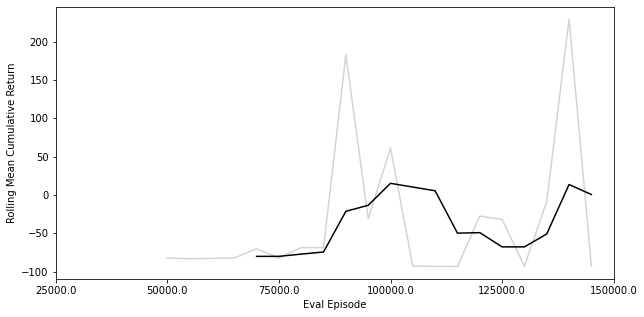

In [31]:
#View the evaluation callback details.
eval_log_path = './logs_CarRacing_ppo/Image_Stack/'
evaluation_log = np.load(eval_log_path + 'evaluations.npz')
evaluation_log_df = pd.DataFrame({item: [np.mean(ep) for ep in evaluation_log[item]] for item in evaluation_log.files})
ax = evaluation_log_df.loc[0:len(evaluation_log_df), 'results'].plot(color = 'lightgray', xlim = [-5, len(evaluation_log_df)], figsize = (10,5))
evaluation_log_df['results'].rolling(5).mean().plot(color = 'black', xlim = [-5, len(evaluation_log_df)])
ax.set_xticklabels(evaluation_log_df['timesteps'])
ax.set_xlabel("Eval Episode")
plt.ylabel("Rolling Mean Cumulative Return")
plt.show()

Save the trained agent.

In [21]:
# Add code here
agent.save("./ppo_CarRacing_ImageStack_agent")

For memory management delete old agent and environment (assumes variable names - change if required).

In [22]:
del agent
del env
del eval_env

### Evaluation

Load the single image saved agent

In [23]:
# Add code here
agent = sb3.ppo.PPO.load("./ppo_CarRacing_SingleImage_agent")

Setup the single image environment for evaluation.

In [24]:
# Add code here
eval_env = gym.make('CarRacing-v0')
eval_env = gym.wrappers.resize_observation.ResizeObservation(eval_env, 64)
eval_env = gym.wrappers.gray_scale_observation.GrayScaleObservation(eval_env, keep_dim = True)

agent.set_env(eval_env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


Evaluate the agent in the environment for 30 episodes, rendering the process. 

In [25]:
# Add code here
# Evaluate
mean_reward, std_reward = sb3.common.evaluation.evaluate_policy(agent, 
                                                                agent.get_env(), 
                                                                n_eval_episodes=30,
                                                                render = True)
print("Mean Reward: {} +/- {}".format(mean_reward, std_reward))

Track generation: 1095..1373 -> 278-tiles track


2022-04-25 23:00:08.586 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f98df7eff50>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 23:00:08.586 python[62229:2848141] Warning: Expected min height of view: (<NSButton: 0x7f98df7e50e0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 23:00:08.588 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f98df7e5870>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 23:00:08.589 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f98df7e65f0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


Track generation: 1060..1332 -> 272-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1384..1734 -> 350-tiles track
Track generation: 1088..1364 -> 276-tiles track
Track generation: 1089..1374 -> 285-tiles track
Track generation: 1043..1321 -> 278-tiles track
Track generation: 1120..1404 -> 284-tiles track
Track generation: 1272..1594 -> 322-tiles track
Track generation: 1280..1604 -> 324-tiles track
Track generation: 1071..1344 -> 273-tiles track
Track generation: 1140..1429 -> 289-tiles track
Track generation: 1189..1490 -> 301-tiles track
Track generation: 1230..1541 -> 311-tiles track
Track generation: 1206..1520 -> 314-tiles track
Track generation: 1079..1353 -> 274-tiles track
Track generation: 1264..1584 -> 320-tiles track
Track generation: 1214..1529 -> 315-tiles track
Track generation: 1166..1461 -> 295-tiles track
Track generation: 1217..1525 -> 308-tiles track
Track generation: 1177..1476 -> 299-tiles track
Track ge

For memory management delete the single image agent (assumes variable names - change if required).

In [26]:
del agent
del eval_env

Load the image stack agent

In [27]:
# Add code here
agent = sb3.ppo.PPO.load("./ppo_CarRacing_ImageStack_agent")


Set up the image stack environment

In [28]:
# Add code here
eval_env = gym.make('CarRacing-v0')
eval_env = gym.wrappers.resize_observation.ResizeObservation(eval_env, 64)
eval_env = gym.wrappers.gray_scale_observation.GrayScaleObservation(eval_env, keep_dim = True)
eval_env = sb3.common.monitor.Monitor(eval_env)
eval_env = sb3.common.vec_env.DummyVecEnv([lambda:eval_env])
eval_env = sb3.common.vec_env.VecFrameStack(eval_env, n_stack=4)

agent.set_env(eval_env)

Wrapping the env in a VecTransposeImage.


Evaluate the agent in the environment for 30 episodes, rendering the process. 

In [29]:
# Add code here
# Evaluate
mean_reward, std_reward = sb3.common.evaluation.evaluate_policy(agent, 
                                                                agent.get_env(), 
                                                                n_eval_episodes=30,
                                                                render = True)
print("Mean Reward: {} +/- {}".format(mean_reward, std_reward))


Track generation: 1176..1478 -> 302-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1246..1562 -> 316-tiles track


2022-04-25 23:08:30.059 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f98f80d9550>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 23:08:30.059 python[62229:2848141] Warning: Expected min height of view: (<NSButton: 0x7f98f80a4fd0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 23:08:30.061 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f98f80cf910>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-25 23:08:30.062 python[62229:2848141] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f98f80ea880>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


Track generation: 1239..1553 -> 314-tiles track
Track generation: 1329..1665 -> 336-tiles track
Track generation: 1246..1567 -> 321-tiles track
Track generation: 1196..1499 -> 303-tiles track
Track generation: 1074..1347 -> 273-tiles track
Track generation: 977..1232 -> 255-tiles track
Track generation: 1131..1418 -> 287-tiles track
Track generation: 1005..1268 -> 263-tiles track
Track generation: 1097..1375 -> 278-tiles track
Track generation: 1140..1429 -> 289-tiles track
Track generation: 1160..1454 -> 294-tiles track
Track generation: 1116..1406 -> 290-tiles track
Track generation: 1050..1319 -> 269-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1204..1509 -> 305-tiles track
Track generation: 1106..1387 -> 281-tiles track
Track generation: 1099..1381 -> 282-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 991..1243 -> 252-tiles track
Track generation: 1195..14

### Reflection

Reflect on which  agent performs better at the task, and the training process involved (max 200 words).

- It is obvious that the agent being trained the game with image stack outperforms that with a single image, bring the mean rewards in the testing phrase from -93.24 up to -19.46. This is likely to be attributed to the fact that more useful information is being feed into the agent of image stack in the decision making process in the context of reinforccement learning.

- However, at the same time, the standard deviation of the model using image stack also goes up to 40.95, compared that of 0.46 for the model with single image setup. This is somehow expeccted, given the nature of reinforcement learning that a large number of iterations. In order to obtain a good performancce with stability, more iterations should be devoted to train the agent in the current setup. 

- Looking at the graphs for the rewards during the training process, the image-stack agent achieved an upward curve in terms of remards, while the single-image agent struggled to gain substantial improvement during the whole traaining process. This is indicating the merit of a image-stack agent in the current context.